## H2O Grid Search ##

In [3]:
import os
os.chdir(r'E:\PML\Datasets-20230112T094652Z-001\Datasets')
import pandas as pd

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

In [5]:
import h2o
from h2o.grid.grid_search import H2OGridSearch
from h2o.estimators.random_forest import H2ORandomForestEstimator

In [8]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 25.202-b08, mixed mode)
  Starting server from C:\Users\dbda-lab\Anaconda3\Lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\dbda-lab\AppData\Local\Temp\tmp6zt4xp_n
  JVM stdout: C:\Users\dbda-lab\AppData\Local\Temp\tmp6zt4xp_n\h2o_dbda_lab_started_from_python.out
  JVM stderr: C:\Users\dbda-lab\AppData\Local\Temp\tmp6zt4xp_n\h2o_dbda_lab_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.4
H2O_cluster_version_age:,22 days
H2O_cluster_name:,H2O_from_python_dbda_lab_oz28u2
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.517 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [36]:
h2o_brupt=h2o.import_file("Bankruptcy/Bankruptcy.csv", destination_frame='brupt')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [37]:
X = h2o_brupt.col_names[2:]
y= 'D'

In [38]:
h2o_brupt['D'] = h2o_brupt['D'].asfactor()

In [39]:
h2o_brupt['D'].levels()

[['0', '1']]

In [28]:
rf_params = {"ntrees":[10,25,50], "max_depth":[5,7,10],"mtries":[3,4,6,8,10]}

In [29]:
rf_h2o = H2ORandomForestEstimator(seed=2022)
rf_grid1=H2OGridSearch(model=rf_h2o, grid_id = 'rf_grid1', hyper_params=rf_params)
rf_grid1.train(x=X,y=y,training_frame=h2o_brupt,seed=2022)
rf_gridperf1 = rf_grid1.get_grid(sort_by='logloss', decreasing=False)

drf Grid Build progress: |███████████████████████████████████████████████████████| (done) 100%


In [30]:
rf_gridperf1

,max_depth,mtries,ntrees,model_ids,logloss
,7.0,4.0,50.0,rf_grid1_model_35,0.4081731
,10.0,4.0,50.0,rf_grid1_model_36,0.4086440
,5.0,10.0,50.0,rf_grid1_model_43,0.4100720
,5.0,4.0,50.0,rf_grid1_model_34,0.4114080
,5.0,8.0,50.0,rf_grid1_model_40,0.4117466
,5.0,10.0,25.0,rf_grid1_model_28,0.4118694
,5.0,3.0,50.0,rf_grid1_model_31,0.4293882
,5.0,3.0,25.0,rf_grid1_model_16,0.6327268
,7.0,10.0,50.0,rf_grid1_model_44,0.6333429
,10.0,10.0,50.0,rf_grid1_model_45,0.6350064


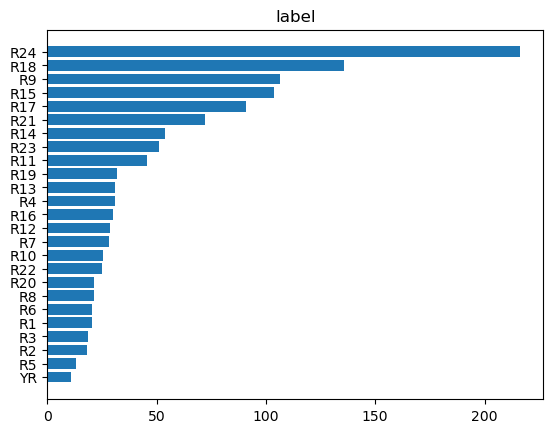

In [32]:
best_rf1 = rf_gridperf1.models[0]
varimp = best_rf1.varimp(use_pandas=True)
imps = varimp['relative_importance']
cols = varimp['variable']
s_index = np.argsort(imps)
s_cols = cols[s_index]
s_imp = imps[s_index]
plt.barh(s_cols,s_imp)
plt.title('label')
plt.show()

### AutoML ###

In [40]:
from h2o.automl import H2OAutoML

aml = H2OAutoML(max_models=20, seed =2023)
aml.train(x=X, y=y, training_frame=h2o_brupt)

AutoML progress: |
09:14:09.537: AutoML: XGBoost is not available; skipping it.
09:14:09.758: _min_rows param, The dataset size is too small to split for min_rows=100.0: must have at least 200.0 (weighted) rows, but have only 132.0.

███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_2_20230128_91409


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          9411                   5            10           7.05714       12            22            16.7714

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.13041594657557176
RMSE: 0.36113148100874803
LogLoss: 0.8733930253776663
Mean Per-Class Error: 0.16666666666666666
AUC: 0.8968089990817263
AUCPR: 0.9106424895826986
Gini: 0.7936179981634526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5294117647058824
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      53   13   0.197    (13.0/66.0)
1      9    57   0.1364   (9.0/66.0)
Total  62   70   0.1667   (22.0/132.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.529412     0.838235  29
max f2                       0.181818     0.884831  45
max f0point5                 0.714286     0.845324  17
max accuracy                 0.625        0.833333  23
max precision                1            1         0
max recall                   0            1         56
max specificity              1            1         0
max absolute_mcc             0.625        0.667894  23
max min_per_class_accuracy   0.571429     0.818182  25
max mean_per_class_accuracy  0.571429     0.833333  25
max tns                      1            66        0
max fns                      1            46        0
max fps                      0            66        56
max tps                      0            66        56
max tnr                      1            1         0
max fnr                      1            0.69697   0
max fpr                      0            1         56
max tpr                      0            1         56

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.74 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.151515                    1                  2         2                  1                1           1                           1                   0.30303         0.30303                    100       100                0.30303
2        0.151515                    0.963889           0         2                  0                0           1                           1                   0               0.30303                    -100      100                0.30303
3        0.204545                    0.897778           2         2                  1                0.927608    1                           0.981232            0.106061        0.409091                   100       100                0.409091
4        0.310606                    0.833333           1.42857   1.80488            0.714286         0.865807    0.902439                    0.941818            0.151515        0.560606                   42.8571   80.4878            0.5
5        0.401515                    0.708571           1.66667   1.77358            0.833333         0.76579     0.886792                    0.901963            0.151515        0.712121 

In [41]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,auc,logloss,aucpr,mean_per_class_error,rmse,mse
XRT_1_AutoML_2_20230128_91409,0.913453,0.618424,0.928601,0.151515,0.345275,0.119215
GBM_grid_1_AutoML_2_20230128_91409_model_3,0.911616,0.385715,0.918615,0.166667,0.352958,0.124579
GBM_4_AutoML_2_20230128_91409,0.90932,0.379322,0.923528,0.189394,0.349104,0.121874
GBM_3_AutoML_2_20230128_91409,0.907254,0.392286,0.924302,0.159091,0.354161,0.12543
GBM_grid_1_AutoML_2_20230128_91409_model_2,0.907025,0.387898,0.924307,0.181818,0.353405,0.124895
GBM_2_AutoML_2_20230128_91409,0.901515,0.394444,0.919886,0.189394,0.356995,0.127446
GBM_grid_1_AutoML_2_20230128_91409_model_1,0.89899,0.406841,0.912058,0.136364,0.360028,0.12962
GBM_5_AutoML_2_20230128_91409,0.896006,0.402744,0.890901,0.151515,0.353031,0.124631
StackedEnsemble_BestOfFamily_1_AutoML_2_20230128_91409,0.895087,0.445888,0.911715,0.166667,0.355814,0.126603
DRF_1_AutoML_2_20230128_91409,0.892332,0.6733,0.904563,0.166667,0.360453,0.129926


In [42]:
m = aml.get_best_model(criterion='auc')
m

Model Details
=============
H2ORandomForestEstimator : Distributed Random Forest
Model Key: XRT_1_AutoML_2_20230128_91409


Model Summary: 
    number_of_trees    number_of_internal_trees    model_size_in_bytes    min_depth    max_depth    mean_depth    min_leaves    max_leaves    mean_leaves
--  -----------------  --------------------------  ---------------------  -----------  -----------  ------------  ------------  ------------  -------------
    35                 35                          9411                   5            10           7.05714       12            22            16.7714

ModelMetricsBinomial: drf
** Reported on train data. **

MSE: 0.13041594657557176
RMSE: 0.36113148100874803
LogLoss: 0.8733930253776663
Mean Per-Class Error: 0.16666666666666666
AUC: 0.8968089990817263
AUCPR: 0.9106424895826986
Gini: 0.7936179981634526

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.5294117647058824
       0    1    Error    Rate
-----  ---  ---  -------  ------------
0      53   13   0.197    (13.0/66.0)
1      9    57   0.1364   (9.0/66.0)
Total  62   70   0.1667   (22.0/132.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.529412     0.838235  29
max f2                       0.181818     0.884831  45
max f0point5                 0.714286     0.845324  17
max accuracy                 0.625        0.833333  23
max precision                1            1         0
max recall                   0            1         56
max specificity              1            1         0
max absolute_mcc             0.625        0.667894  23
max min_per_class_accuracy   0.571429     0.818182  25
max mean_per_class_accuracy  0.571429     0.833333  25
max tns                      1            66        0
max fns                      1            46        0
max fps                      0            66        56
max tps                      0            66        56
max tnr                      1            1         0
max fnr                      1            0.69697   0
max fpr                      0            1         56
max tpr                      0            1         56

Gains/Lift Table: Avg response rate: 50.00 %, avg score: 50.74 %
group    cumulative_data_fraction    lower_threshold    lift      cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  --------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.151515                    1                  2         2                  1                1           1                           1                   0.30303         0.30303                    100       100                0.30303
2        0.151515                    0.963889           0         2                  0                0           1                           1                   0               0.30303                    -100      100                0.30303
3        0.204545                    0.897778           2         2                  1                0.927608    1                           0.981232            0.106061        0.409091                   100       100                0.409091
4        0.310606                    0.833333           1.42857   1.80488            0.714286         0.865807    0.902439                    0.941818            0.151515        0.560606                   42.8571   80.4878            0.5
5        0.401515                    0.708571           1.66667   1.77358            0.833333         0.76579     0.886792                    0.901963            0.151515        0.712121 

In [45]:
h2o_concrete=h2o.import_file("Concrete Strength/Concrete_Data.csv", destination_frame='concrete')

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [46]:
h2o_concrete.col_names

['Cement',
 'Blast',
 'Fly',
 'Water',
 'Superplasticizer',
 'Coarse',
 'Fine',
 'Age',
 'Strength']

In [50]:
X = h2o_concrete.col_names[:-1]
y= 'Strength'

In [51]:
aml = H2OAutoML(max_models=20, seed =2023)
aml.train(x=X, y=y, training_frame=h2o_concrete)

AutoML progress: |
09:24:27.928: AutoML: XGBoost is not available; skipping it.

███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.537111,0.1473211,2.6660447,2.3613222,2.6165404,2.648199,2.393449
mean_residual_deviance,14.854194,2.0275729,15.687996,14.014149,14.616207,17.71098,12.241639
mse,14.854194,2.0275729,15.687996,14.014149,14.616207,17.71098,12.241639
null_deviance,57499.586,3060.3196,55579.645,62510.34,55256.516,58355.883,55795.54
r2,0.9467057,0.0067206,0.9445121,0.9479663,0.9460361,0.938219,0.9567949
residual_deviance,3057.7024,436.11023,3074.8472,3237.2683,2981.7063,3595.3289,2399.3613
rmse,3.8469434,0.2627282,3.9608076,3.7435477,3.8231149,4.2084413,3.4988055
rmsle,0.1197382,0.0058659,0.1158795,0.1143735,0.1166752,0.1237474,0.1280152


In [52]:
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_3_20230128_92427,3.84224,14.7628,2.53472,0.119529,14.7628
StackedEnsemble_BestOfFamily_1_AutoML_3_20230128_92427,3.97252,15.7809,2.68324,0.126249,15.7809
GBM_4_AutoML_3_20230128_92427,4.01862,16.1493,2.68588,0.128758,16.1493
GBM_grid_1_AutoML_3_20230128_92427_model_4,4.05729,16.4616,2.65466,0.126113,16.4616
GBM_3_AutoML_3_20230128_92427,4.06428,16.5184,2.73347,0.131316,16.5184
GBM_grid_1_AutoML_3_20230128_92427_model_1,4.08008,16.647,2.60523,0.12747,16.647
GBM_2_AutoML_3_20230128_92427,4.0804,16.6496,2.73799,0.130006,16.6496
GBM_5_AutoML_3_20230128_92427,4.10164,16.8235,2.68223,0.126464,16.8235
GBM_grid_1_AutoML_3_20230128_92427_model_3,4.19904,17.6319,2.78047,0.138137,17.6319
GBM_grid_1_AutoML_3_20230128_92427_model_2,4.41187,19.4646,3.09474,0.148792,19.4646


In [54]:
m = aml.get_best_model(criterion='RMSE')
m

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,2.537111,0.1473211,2.6660447,2.3613222,2.6165404,2.648199,2.393449
mean_residual_deviance,14.854194,2.0275729,15.687996,14.014149,14.616207,17.71098,12.241639
mse,14.854194,2.0275729,15.687996,14.014149,14.616207,17.71098,12.241639
null_deviance,57499.586,3060.3196,55579.645,62510.34,55256.516,58355.883,55795.54
r2,0.9467057,0.0067206,0.9445121,0.9479663,0.9460361,0.938219,0.9567949
residual_deviance,3057.7024,436.11023,3074.8472,3237.2683,2981.7063,3595.3289,2399.3613
rmse,3.8469434,0.2627282,3.9608076,3.7435477,3.8231149,4.2084413,3.4988055
rmsle,0.1197382,0.0058659,0.1158795,0.1143735,0.1166752,0.1237474,0.1280152


In [56]:
h2o.cluster().shutdown()

## Stacked Ensemble ##

Ensemble machine learning methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms. Many of the popular modern machine learning algorithms are actually ensembles. For example, Random Forest and Gradient Boosting Machine (GBM) are both ensemble learners. Both bagging (e.g. Random Forest) and boosting (e.g. GBM) are methods for ensembling that take a collection of weak learners (e.g. decision tree) and form a single, strong learner.

H2O’s Stacked Ensemble method is a supervised ensemble machine learning algorithm that finds the optimal combination of a collection of prediction algorithms using a process called stacking. Like all supervised models in H2O, Stacked Ensemeble supports regression, binary classification, and multiclass classification.

### Stacking / Super Learning ###

Stacking, also called Super Learning or Stacked Regression, is a class of algorithms that involves training a second-level “metalearner” to find the optimal combination of the base learners. Unlike bagging and boosting, the goal in stacking is to ensemble strong, diverse sets of learners together.

Super Learner Algorithm
The steps below describe the individual tasks involved in training and testing a Super Learner ensemble. H2O automates most of the steps below so that you can quickly and easily build ensembles of H2O models.

- Set up the ensemble.

   - Specify a list of L base algorithms (with a specific set of model parameters).

   - Specify a metalearning algorithm.

- Train the ensemble.

    - Train each of the L base algorithms on the training set.

    - Perform k-fold cross-validation on each of these learners and collect the cross-validated predicted values from each of the L algorithms.

    - The N cross-validated predicted values from each of the L algorithms can be combined to form a new N x L matrix. This matrix, along with the original response vector, is called the “level-one” data. (N = number of rows in the training set.)

    - Train the metalearning algorithm on the level-one data. The “ensemble model” consists of the L base learning models and the metalearning model, which can then be used to generate predictions on a test set.

- Predict on new data.

    - To generate ensemble predictions, first generate predictions from the base learners.

    - Feed those predictions into the metalearner to generate the ensemble prediction.

In [1]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold,GridSearchCV,KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import StackingClassifier

In [6]:
bank = pd.read_csv("Bankruptcy/Bankruptcy.csv")
bank

,NO,D,YR,R1,R2,R3,R4,R5,R6,R7,...,R15,R16,R17,R18,R19,R20,R21,R22,R23,R24
0,1,0,78,0.23,0.08,0.02,0.03,0.46,0.12,0.19,...,0.05,0.57,0.15,0.23,3.56,0.26,1.55,0.43,0.11,0.17
1,2,0,77,0.19,0.07,0.09,0.12,0.02,0.02,0.03,...,0.09,0.12,0.16,0.22,3.78,1.29,1.40,0.06,0.07,0.10
2,3,0,72,0.07,0.02,0.03,0.05,0.06,0.10,0.14,...,-0.03,0.02,0.02,0.04,13.29,1.61,1.43,0.03,0.05,0.07
3,4,0,80,0.07,0.03,0.04,0.04,0.04,0.06,0.06,...,-0.02,0.01,0.02,0.02,5.36,1.30,1.12,-0.06,-0.08,-0.09
4,5,0,81,0.09,0.02,0.03,0.04,0.06,0.08,0.11,...,0.02,0.07,0.10,0.14,7.74,1.48,1.41,0.03,0.04,0.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
127,128,1,77,0.27,0.03,0.07,0.10,0.09,0.18,0.26,...,0.11,0.06,0.12,0.17,7.56,2.07,1.45,0.06,0.13,0.19
128,129,1,77,0.32,0.03,0.03,0.09,0.05,0.06,0.16,...,0.17,0.07,0.09,0.26,5.99,1.27,2.74,0.06,0.08,0.21
129,130,1,78,0.08,0.01,0.02,0.05,0.04,0.07,0.15,...,0.19,0.07,0.12,0.26,7.14,1.89,2.10,0.07,0.12,0.26
130,131,1,78,0.14,0.01,0.05,0.07,0.02,0.09,0.14,...,0.07,0.02,0.10,0.15,170.96,4.55,1.45,0.02,0.10,0.14


In [7]:
X = bank.drop(["NO","D"],axis=1)
y = bank["D"]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y, random_state=2023, test_size=0.3)

In [9]:
nb = GaussianNB()
svm_l = SVC(probability=True, random_state=2023, kernel='linear')
lr = LogisticRegression(random_state=2023)
gbm = GradientBoostingClassifier(random_state=2023)
kfold=StratifiedKFold(random_state=2023, shuffle=True)
stack = StackingClassifier(estimators=[('NB',nb),('SVM',svm_l),('LR',lr)],final_estimator=gbm,stack_method="predict_proba",cv=kfold)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred_prob = stack.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.85
0.8325


C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

**passthrough** - Enabling this option it passes the original data as input along with the predictions of the base learners.

In [10]:
nb = GaussianNB()
svm_l = SVC(probability=True, random_state=2023, kernel='linear')
lr = LogisticRegression(random_state=2023)
gbm = GradientBoostingClassifier(random_state=2023)
kfold=StratifiedKFold(random_state=2023, shuffle=True)
stack = StackingClassifier(estimators=[('NB',nb),('SVM',svm_l),('LR',lr)],final_estimator=gbm,stack_method="predict_proba",
                           cv=kfold, passthrough=True)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred_prob = stack.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n

0.85
0.9375


With Pipelining

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [12]:
nb = GaussianNB()
svm_l = SVC(probability=True, random_state=2023, kernel='linear')
lr = LogisticRegression(random_state=2023,solver='saga',penalty='elasticnet',l1_ratio=0.4)
gbm = GradientBoostingClassifier(random_state=2023)
kfold=StratifiedKFold(random_state=2023, shuffle=True)
scaler1=StandardScaler()
pipe1=Pipeline([('SC',scaler1),('LR',lr)])
stack = StackingClassifier(estimators=[('NB',nb),('SVM',svm_l),('LR',pipe1)],final_estimator=gbm,stack_method="predict_proba",
                           cv=kfold, passthrough=True)

stack.fit(X_train, y_train)
y_pred = stack.predict(X_test)
print(accuracy_score(y_test, y_pred))
y_pred_prob = stack.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_pred_prob))

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.85
0.9325000000000001


C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [13]:
params = {'SVM__SVM__C':np.linspace(0.01,10,5),'LR__LR__penalty':['l2','l1','elasticnet',None]}

In [24]:
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
nb = GaussianNB()
svm_l = SVC(probability=True, random_state=2023, kernel='linear')
lr = LogisticRegression(random_state=2023,solver='saga')
gbm = GradientBoostingClassifier(random_state=2023)
scaler1=MinMaxScaler()
scaler2=MinMaxScaler()
pipe1=Pipeline([('SC',scaler1),('LR',lr)])
pipe2=Pipeline([('SC',scaler2),('SVM',svm_l)])
stack = StackingClassifier(estimators=[('NB',nb),('SVM',pipe2),('LR',pipe1)],final_estimator=gbm,stack_method="predict_proba",
                           cv=kfold, passthrough=True)

In [25]:
#print(stack.get_params())
gcv = GridSearchCV(stack, param_grid=params, cv=kfold, scoring='roc_auc',n_jobs=-1)


In [26]:
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
25 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py", line 660, in fit
    return super().fit(X, y_encoded, sample_weight)
  File "C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\ensemble\_stacking.py", line 210, in fit
    self.estimators_ = Parallel(n_jobs=self.n

{'LR__LR__penalty': None, 'SVM__SVM__C': 5.005}
0.8939137785291631


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_LR__LR__penalty,param_SVM__SVM__C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.442742,0.009051,0.010394,0.001854,l2,0.01,"{'LR__LR__penalty': 'l2', 'SVM__SVM__C': 0.01}",0.895604,0.796703,0.928994,0.792899,0.982249,0.879290,0.074325,11
1,0.437746,0.005326,0.009395,0.000799,l2,2.5075,"{'LR__LR__penalty': 'l2', 'SVM__SVM__C': 2.5075}",0.906593,0.818681,0.940828,0.786982,0.976331,0.885883,0.072009,7
2,0.451739,0.007066,0.010194,0.000977,l2,5.005,"{'LR__LR__penalty': 'l2', 'SVM__SVM__C': 5.005}",0.884615,0.807692,0.946746,0.792899,0.976331,0.881657,0.072880,9
3,0.455936,0.010937,0.012993,0.005689,l2,7.5025,"{'LR__LR__penalty': 'l2', 'SVM__SVM__C': 7.502...",0.890110,0.824176,0.940828,0.810651,0.982249,0.889603,0.065912,4
4,0.457536,0.009902,0.009394,0.000489,l2,10.0,"{'LR__LR__penalty': 'l2', 'SVM__SVM__C': 10.0}",0.873626,0.813187,0.934911,0.810651,0.982249,0.882925,0.067441,8
5,0.457135,0.011920,0.010594,0.002244,l1,0.01,"{'LR__LR__penalty': 'l1', 'SVM__SVM__C': 0.01}",0.879121,0.758242,0.917160,0.781065,0.982249,0.863567,0.083785,15
6,0.463531,0.012976,0.009794,0.000400,l1,2.5075,"{'LR__LR__penalty': 'l1', 'SVM__SVM__C': 2.5075}",0.895604,0.752747,0.928994,0.775148,0.976331,0.865765,0.087290,14
7,0.471328,0.008587,0.010393,0.001018,l1,5.005,"{'LR__LR__penalty': 'l1', 'SVM__SVM__C': 5.005}",0.884615,0.758242,0.928994,0.792899,0.982249,0.869400,0.083338,13
8,0.455736,0.009565,0.009395,0.000490,l1,7.5025,"{'LR__LR__penalty': 'l1', 'SVM__SVM__C': 7.502...",0.890110,0.780220,0.934911,0.804734,0.988166,0.879628,0.078023,10
9,0.477923,0.020939,0.010594,0.001624,l1,10.0,"{'LR__LR__penalty': 'l1', 'SVM__SVM__C': 10.0}",0.895604,0.769231,0.928994,0.804734,0.988166,0.877346,0.080304,12


In [27]:
from sklearn.preprocessing import LabelEncoder
pix = pd.read_csv("Image Segmentation/Image_Segmention.csv")
pix.head(10)

,Class,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,BRICKFACE,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,BRICKFACE,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,BRICKFACE,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,BRICKFACE,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,BRICKFACE,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
5,BRICKFACE,26,67,9,0.111111,0.0,1.000000,0.888890,2.444445,3.185185,20.000000,19.555555,25.888890,14.555555,-1.333333,17.666666,-16.333334,25.888890,0.436939,-1.623202
6,BRICKFACE,14,110,9,0.000000,0.0,1.722222,5.351851,2.666667,1.022223,17.925926,18.888890,21.444445,13.444445,2.888889,10.555555,-13.444445,21.444445,0.368848,-1.345096
7,BRICKFACE,11,108,9,0.000000,0.0,1.333333,0.800000,1.388889,0.951852,17.666666,19.000000,21.111110,12.888889,4.000000,10.333333,-14.333333,21.111110,0.388756,-1.302133
8,BRICKFACE,85,101,9,0.000000,0.0,1.333333,1.288888,1.277778,1.218518,21.296297,21.222221,26.777779,15.888889,-0.222222,16.444445,-16.222221,26.777779,0.404792,-1.558599
9,BRICKFACE,18,145,9,0.000000,0.0,0.388889,0.018518,0.611111,0.374074,3.925926,5.555555,4.000000,2.222222,4.888889,0.222222,-5.111111,5.555555,0.600529,-0.570940


In [28]:
X = pix.drop('Class', axis=1)
y = pix['Class']
X

,region.centroid.col,region.centroid.row,region.pixel.count,short.line.density.5,short.line.density.2,vedge.mean,vegde.sd,hedge.mean,hedge.sd,intensity.mean,rawred.mean,rawblue.mean,rawgreen.mean,exred.mean,exblue.mean,exgreen.mean,value.mean,saturation.mean,hue-mean
0,188,133,9,0.000000,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
1,105,139,9,0.000000,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
2,34,137,9,0.000000,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
3,39,111,9,0.000000,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773
4,16,128,9,0.000000,0.0,0.500000,0.077778,0.666667,0.311111,5.555555,6.888889,6.666666,3.111111,4.000000,3.333333,-7.333334,7.111111,0.561508,-0.985811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204,36,243,9,0.111111,0.0,1.888889,1.851851,2.000000,0.711110,13.333333,9.888889,12.111111,18.000000,-10.333333,-3.666667,14.000000,18.000000,0.452229,2.368311
205,186,218,9,0.000000,0.0,1.166667,0.744444,1.166667,0.655555,13.703704,10.666667,12.666667,17.777779,-9.111111,-3.111111,12.222222,17.777779,0.401347,2.382684
206,197,236,9,0.000000,0.0,2.444444,6.829628,3.333333,7.599998,16.074074,13.111111,16.666668,18.444445,-8.888889,1.777778,7.111111,18.555555,0.292729,2.789800
207,208,240,9,0.111111,0.0,1.055556,0.862963,2.444444,5.007407,14.148149,10.888889,13.000000,18.555555,-9.777778,-3.444444,13.222222,18.555555,0.421621,2.392487


In [29]:
label=LabelEncoder()
le_y=label.fit_transform(y)
le_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3])

In [53]:
params = {'SVM__SVM__C':np.linspace(0.001,10,5),'DTC__max_depth':[None,2,4], 'DTC__min_samples_leaf':[1,4],'DTC__min_samples_split':[2,5,10],'final_estimator__max_features':[3,4,5,6]}

In [55]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
kfold=StratifiedKFold(n_splits=5, shuffle=True, random_state=2023)
nb = GaussianNB()
dtc=DecisionTreeClassifier(random_state=2023)
svm_l = SVC(probability=True, random_state=2023, kernel='linear',n_jobs=-1)
rfc = RandomForestClassifier(random_state=2023,n_jobs=-1)
scaler1=MinMaxScaler()
pipe1=Pipeline([('SC',scaler1),('SVM',svm_l)])
stack = StackingClassifier(estimators=[('SVM',pipe1),('DTC',dtc),('NB',nb)],final_estimator=rfc,stack_method="predict_proba",
                           cv=kfold, passthrough=True,n_jobs=-1)

In [56]:
gcv = GridSearchCV(stack, param_grid=params, cv=kfold, scoring='neg_log_loss',n_jobs=-1)
gcv.fit(X,le_y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'DTC__max_depth': None, 'DTC__min_samples_leaf': 1, 'DTC__min_samples_split': 2, 'SVM__SVM__C': 10.0, 'final_estimator__max_features': 5}
-0.2803219019292872


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DTC__max_depth,param_DTC__min_samples_leaf,param_DTC__min_samples_split,param_SVM__SVM__C,param_final_estimator__max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.544287,0.038108,0.044375,0.004077,None,1,2,0.001,3,"{'DTC__max_depth': None, 'DTC__min_samples_lea...",-0.615491,-0.357232,-0.355940,-0.422170,-0.302343,-0.410635,0.109243,301
1,0.584865,0.070735,0.041375,0.002869,None,1,2,0.001,4,"{'DTC__max_depth': None, 'DTC__min_samples_lea...",-0.589582,-0.272645,-0.332658,-0.374979,-0.281121,-0.370197,0.115770,276
2,0.576467,0.060716,0.059965,0.027480,None,1,2,0.001,5,"{'DTC__max_depth': None, 'DTC__min_samples_lea...",-0.668244,-0.261126,-0.264778,-0.364461,-0.262512,-0.364224,0.157030,270
3,0.573469,0.048685,0.035980,0.001413,None,1,2,0.001,6,"{'DTC__max_depth': None, 'DTC__min_samples_lea...",-0.612319,-0.252402,-0.274491,-0.355047,-0.245891,-0.348030,0.137756,239
4,0.554879,0.047611,0.036579,0.001854,None,1,2,2.50075,3,"{'DTC__max_depth': None, 'DTC__min_samples_lea...",-0.569926,-0.170358,-0.256807,-0.304084,-0.263865,-0.313008,0.135654,170
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,0.531693,0.030235,0.050971,0.009524,4,4,10,7.50025,6,"{'DTC__max_depth': 4, 'DTC__min_samples_leaf':...",-0.518118,-0.166658,-0.220367,-0.339261,-0.203203,-0.289521,0.128109,17
356,0.515903,0.023159,0.041576,0.004797,4,4,10,10.0,3,"{'DTC__max_depth': 4, 'DTC__min_samples_leaf':...",-0.539743,-0.212685,-0.263864,-0.296851,-0.253017,-0.313232,0.116403,171
357,0.552481,0.017916,0.040178,0.003247,4,4,10,10.0,4,"{'DTC__max_depth': 4, 'DTC__min_samples_leaf':...",-0.515715,-0.172657,-0.243306,-0.290922,-0.231995,-0.290919,0.118540,23
358,0.527895,0.028461,0.040177,0.004443,4,4,10,10.0,5,"{'DTC__max_depth': 4, 'DTC__min_samples_leaf':...",-0.534574,-0.169007,-0.234517,-0.335125,-0.233258,-0.301296,0.128181,69


***
With Regression

In [57]:
expenses = pd.read_csv("Medical Cost Personal/insurance.csv")
expenses.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [58]:
X = expenses.drop('charges', axis=1)
y = expenses['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [59]:
X=pd.get_dummies(X,drop_first=True)
X

,age,bmi,children,sex_male,smoker_yes,region_northwest,region_southeast,region_southwest
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,30.970,3,1,0,1,0,0
1334,18,31.920,0,0,0,0,0,0
1335,18,36.850,0,0,0,0,1,0
1336,21,25.800,0,0,0,0,0,1


In [60]:
params = {'ENR__alpha':np.linspace(0.001,10,5),'ENR__l1_ratio':np.linspace(0,1,5),'DTR__max_depth':[None,2,4], 'DTR__min_samples_leaf':[1,4],'DTR__min_samples_split':[2,5,10],'final_estimator__n_estimators':[20,50],'final_estimator__learning_rate':np.linspace(0.01,0.5,5),'final_estimator__max_depth':[3,5]}

In [66]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBRegressor
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
lr = LinearRegression()
enr = ElasticNet(random_state=2023)
dtr=DecisionTreeRegressor(random_state=2023)
xgb = XGBRegressor(random_state=2023,n_jobs=-1)
stack = StackingRegressor(estimators=[('LR',lr),('ENR',enr),('DTR',dtr)],final_estimator=xgb,
                           cv=kfold, passthrough=True,n_jobs=-1)

In [67]:
gcv = GridSearchCV(stack, param_grid=params, cv=kfold, scoring='r2',n_jobs=-1)
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'DTR__max_depth': 4, 'DTR__min_samples_leaf': 4, 'DTR__min_samples_split': 2, 'ENR__alpha': 2.50075, 'ENR__l1_ratio': 0.5, 'final_estimator__learning_rate': 0.255, 'final_estimator__max_depth': 3, 'final_estimator__n_estimators': 20}
0.8621011987157559


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DTR__max_depth,param_DTR__min_samples_leaf,param_DTR__min_samples_split,param_ENR__alpha,param_ENR__l1_ratio,param_final_estimator__learning_rate,...,param_final_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.274242,0.010379,0.009994,0.000632,None,1,2,0.001,0.0,0.01,...,20,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",-0.610402,-0.562158,-0.567285,-0.452269,-0.489813,-0.536385,0.057170,8903
1,0.301826,0.014771,0.012792,0.001599,None,1,2,0.001,0.0,0.01,...,50,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",0.049089,0.047139,0.059282,0.151730,0.115789,0.084606,0.041916,7876
2,0.270643,0.023012,0.013393,0.003496,None,1,2,0.001,0.0,0.01,...,20,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",-0.607664,-0.555796,-0.564105,-0.450979,-0.485613,-0.532831,0.056630,8465
3,0.377983,0.062091,0.017790,0.009190,None,1,2,0.001,0.0,0.01,...,50,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",0.054080,0.054209,0.063490,0.154252,0.119900,0.089186,0.040726,7523
4,0.250656,0.020574,0.013792,0.004954,None,1,2,0.001,0.0,0.1325,...,20,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",0.854136,0.839430,0.854351,0.867826,0.848508,0.852850,0.009243,1961
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,0.266446,0.004713,0.012393,0.001624,4,4,10,10.0,1.0,0.3775,...,50,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.816832,0.808103,0.824497,0.820222,0.813074,0.816545,0.005660,6888
8996,0.163706,0.005416,0.011593,0.002869,4,4,10,10.0,1.0,0.5,...,20,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.856184,0.839716,0.859682,0.849098,0.833865,0.847709,0.009723,3832
8997,0.210279,0.007224,0.011594,0.002575,4,4,10,10.0,1.0,0.5,...,50,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.834814,0.820913,0.849286,0.839147,0.815544,0.831941,0.012260,5970
8998,0.185095,0.006847,0.011192,0.002562,4,4,10,10.0,1.0,0.5,...,20,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.843685,0.826818,0.846154,0.836449,0.810447,0.832711,0.013004,5872


***
**Bike Sharing Demand Problem**

In [109]:
bike = pd.read_csv("bike-sharing-demand/train.csv")
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [110]:
bike['datetime']=pd.to_datetime(bike['datetime'])
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [111]:
bike['month']=bike['datetime'].dt.month
bike['day']=bike['datetime'].dt.day
bike['hour_of_day']=bike['datetime'].dt.hour
bike

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,month,day,hour_of_day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,1,1,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,1,1,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,1,1,2
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,1,1,3
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,12,19,19
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,12,19,20
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,12,19,21
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,12,19,22


In [112]:
X=bike.drop(['datetime','count','casual','registered'],axis=1)
y=bike['count']

In [113]:
params = {'DTR__max_depth':[None,2,4], 'DTR__min_samples_leaf':[1,4],'DTR__min_samples_split':[2,5,10],'final_estimator__n_estimators':[20,50],'final_estimator__learning_rate':np.linspace(0.01,0.5,5),'final_estimator__max_depth':[3,5]}
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
lr = LinearRegression()
enr = ElasticNet(random_state=2023)
dtr=DecisionTreeRegressor(random_state=2023)
xgb = XGBRegressor(random_state=2023,n_jobs=-1)
stack = StackingRegressor(estimators=[('LR',lr),('ENR',enr),('DTR',dtr)],final_estimator=xgb,
                           cv=kfold, passthrough=True,n_jobs=-1)

In [115]:
gcv = GridSearchCV(stack, param_grid=params, cv=kfold, scoring='r2',n_jobs=-1)
gcv.fit(X,y)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

{'DTR__max_depth': 2, 'DTR__min_samples_leaf': 1, 'DTR__min_samples_split': 2, 'final_estimator__learning_rate': 0.3775, 'final_estimator__max_depth': 5, 'final_estimator__n_estimators': 50}
0.860546140090926


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_DTR__max_depth,param_DTR__min_samples_leaf,param_DTR__min_samples_split,param_final_estimator__learning_rate,param_final_estimator__max_depth,param_final_estimator__n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.786549,0.055576,0.019588,0.007935,None,1,2,0.01,3,20,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",-0.501321,-0.496495,-0.491790,-0.506931,-0.492840,-0.497875,0.005624,336
1,1.098369,0.089563,0.019188,0.006965,None,1,2,0.01,3,50,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",0.058600,0.082621,0.071324,0.067202,0.064238,0.068797,0.008060,300
2,0.918272,0.042891,0.017390,0.008863,None,1,2,0.01,5,20,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",-0.495121,-0.489933,-0.481531,-0.498136,-0.487505,-0.490445,0.005820,334
3,1.322443,0.041070,0.023585,0.012100,None,1,2,0.01,5,50,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",0.070899,0.095295,0.089681,0.083457,0.077010,0.083268,0.008694,298
4,0.747371,0.039237,0.015791,0.004259,None,1,2,0.1325,3,20,"{'DTR__max_depth': None, 'DTR__min_samples_lea...",0.762721,0.795994,0.778730,0.771859,0.788855,0.779632,0.011832,234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355,1.122954,0.052321,0.024787,0.017130,4,4,10,0.3775,5,50,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.857552,0.863562,0.851348,0.859241,0.860710,0.858483,0.004077,25
356,0.408167,0.053782,0.014791,0.004440,4,4,10,0.5,3,20,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.772525,0.815034,0.782400,0.809952,0.784872,0.792956,0.016556,226
357,0.740775,0.029798,0.015793,0.003488,4,4,10,0.5,3,50,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.817088,0.838393,0.817378,0.831260,0.816988,0.824221,0.008949,144
358,0.576269,0.027089,0.022987,0.022005,4,4,10,0.5,5,20,"{'DTR__max_depth': 4, 'DTR__min_samples_leaf':...",0.844138,0.853397,0.844467,0.850631,0.843852,0.847297,0.003954,37


In [116]:
bike_test=pd.read_csv("bike-sharing-demand/test.csv")
best_model=gcv.best_estimator_

In [117]:
bike_test['datetime']=pd.to_datetime(bike_test['datetime'])
bike_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014
...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981


In [118]:
bike_test['month']=bike_test['datetime'].dt.month
bike_test['day']=bike_test['datetime'].dt.day
bike_test['hour_of_day']=bike_test['datetime'].dt.hour
bike_test

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour_of_day
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,1,20,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,1
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,1,20,2
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,20,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...,...
6488,2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,12,31,19
6489,2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,12,31,20
6490,2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,12,31,21
6491,2012-12-31 22:00:00,1,0,1,1,10.66,13.635,56,8.9981,12,31,22


In [119]:
X_test=bike_test.drop('datetime',axis=1)
X_test

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour_of_day
0,1,0,1,1,10.66,11.365,56,26.0027,1,20,0
1,1,0,1,1,10.66,13.635,56,0.0000,1,20,1
2,1,0,1,1,10.66,13.635,56,0.0000,1,20,2
3,1,0,1,1,10.66,12.880,56,11.0014,1,20,3
4,1,0,1,1,10.66,12.880,56,11.0014,1,20,4
...,...,...,...,...,...,...,...,...,...,...,...
6488,1,0,1,2,10.66,12.880,60,11.0014,12,31,19
6489,1,0,1,2,10.66,12.880,60,11.0014,12,31,20
6490,1,0,1,1,10.66,12.880,60,11.0014,12,31,21
6491,1,0,1,1,10.66,13.635,56,8.9981,12,31,22


In [120]:
y_pred = best_model.predict(X_test)

In [121]:
sample = pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
sample

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [122]:
sample['count'] = y_pred
sample

,datetime,count
0,2011-01-20 00:00:00,38.592934
1,2011-01-20 01:00:00,8.375719
2,2011-01-20 02:00:00,0.397058
3,2011-01-20 03:00:00,1.441001
4,2011-01-20 04:00:00,1.441001
...,...,...
6488,2012-12-31 19:00:00,164.344345
6489,2012-12-31 20:00:00,159.529999
6490,2012-12-31 21:00:00,146.479202
6491,2012-12-31 22:00:00,113.233521


In [123]:
sample.to_csv('bike_submit.csv',index=False)

***
**Sir's way**

In [125]:
bike = pd.read_csv("bike-sharing-demand/train.csv")
bike_test = pd.read_csv("bike-sharing-demand/test.csv")

In [126]:
bike['season'] = bike['season'].astype(object)
bike_test['season'] = bike_test['season'].astype(object)


In [127]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)

In [130]:
y_train = bike['count']

In [134]:
X_train.shape,y_train.shape

((10886, 11), (10886,))

In [128]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [135]:
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
params = {"max_features":[3,4,5,6,7]}
bagging = RandomForestRegressor(random_state=2023, n_jobs=-1)
gcv = GridSearchCV(bagging, param_grid=params,verbose=10, cv=kfold, scoring='r2',n_jobs=-1)
gcv.fit(X_train,y_train)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'max_features': 3}
0.3108830511605533


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.249682,0.433149,0.943659,0.392576,3,{'max_features': 3},0.320638,0.318763,0.329524,0.296766,0.288725,0.310883,0.015460,1
1,1.717214,0.523794,0.641633,0.634323,4,{'max_features': 4},0.316298,0.312903,0.330010,0.288734,0.285179,0.306625,0.017087,2
2,2.052022,0.524785,0.499914,0.536254,5,{'max_features': 5},0.316123,0.309721,0.323580,0.284042,0.281278,0.302949,0.017159,4
3,1.779978,0.707497,1.005024,0.767693,6,{'max_features': 6},0.313754,0.307385,0.328549,0.284754,0.284130,0.303714,0.017170,3
4,2.235318,0.836462,0.116934,0.049369,7,{'max_features': 7},0.311701,0.304651,0.325690,0.280073,0.282139,0.300851,0.017499,5


In [136]:
from lightgbm import LGBMRegressor

In [137]:
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
params = {"max_features":[3,4,5,6,7]}
bagging = LGBMRegressor(random_state=2023, n_jobs=-1)
gcv = GridSearchCV(bagging, param_grid=params,verbose=10, cv=kfold, scoring='r2',n_jobs=-1)
gcv.fit(X_train,y_train)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
[LightGBM] [Warning] Unknown parameter: max_features
{'max_features': 3}
0.3621338293493861


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.130125,0.004871,0.022189,0.001938,3,{'max_features': 3},0.360162,0.363215,0.378593,0.3633,0.345399,0.362134,0.010558,1
1,0.128325,0.002651,0.016991,0.002682,4,{'max_features': 4},0.360162,0.363215,0.378593,0.3633,0.345399,0.362134,0.010558,1
2,0.132324,0.006147,0.020988,0.001265,5,{'max_features': 5},0.360162,0.363215,0.378593,0.3633,0.345399,0.362134,0.010558,1
3,0.136520,0.004497,0.017590,0.001019,6,{'max_features': 6},0.360162,0.363215,0.378593,0.3633,0.345399,0.362134,0.010558,1
4,0.129125,0.021392,0.015791,0.001469,7,{'max_features': 7},0.360162,0.363215,0.378593,0.3633,0.345399,0.362134,0.010558,1


In [139]:
bike['datetime']=pd.to_datetime(bike['datetime'])
bike_test['datetime']=pd.to_datetime(bike_test['datetime'])

In [140]:
bike['year']=bike['datetime'].dt.year
bike['month']=bike['datetime'].dt.month
bike['day']=bike['datetime'].dt.day
bike['hour_of_day']=bike['datetime'].dt.hour
bike['weekday']=bike['datetime'].dt.weekday

In [142]:
bike_test['year']=bike_test['datetime'].dt.year
bike_test['month']=bike_test['datetime'].dt.month
bike_test['day']=bike_test['datetime'].dt.day
bike_test['hour_of_day']=bike_test['datetime'].dt.hour
bike_test['weekday']=bike_test['datetime'].dt.weekday

In [143]:
bike['season'] = bike['season'].astype(object)
bike_test['season'] = bike_test['season'].astype(object)

In [144]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)

In [145]:
y_train = bike['count']

In [146]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [147]:
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
params = {"max_features":[3,4,5,6,7]}
bagging = RandomForestRegressor(random_state=2023, n_jobs=-1)
gcv = GridSearchCV(bagging, param_grid=params,verbose=10, cv=kfold, scoring='neg_root_mean_squared_error',n_jobs=-1)
gcv.fit(X_train,y_train)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'max_features': 7}
0.9346378868343479


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,2.200936,0.260632,0.259452,0.089116,3,{'max_features': 3},0.834497,0.855106,0.848961,0.837803,0.849095,0.845093,0.007703,5
1,1.666644,0.527515,0.989434,0.844033,4,{'max_features': 4},0.878449,0.887838,0.886172,0.878119,0.876359,0.881387,0.004671,4
2,2.720241,0.089696,0.263048,0.049423,5,{'max_features': 5},0.903549,0.912918,0.906571,0.905571,0.902919,0.906306,0.003561,3
3,2.581320,0.256619,0.780552,0.385631,6,{'max_features': 6},0.925742,0.926266,0.923704,0.929183,0.923117,0.925602,0.002148,2
4,2.490771,0.999400,0.480125,0.515237,7,{'max_features': 7},0.933321,0.936574,0.931582,0.938738,0.932974,0.934638,0.002623,1


In [148]:
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
params = {"max_features":[3,4,5,6,7]}
bagging = LGBMRegressor(random_state=2023, n_jobs=-1)
gcv = GridSearchCV(bagging, param_grid=params,verbose=10, cv=kfold, scoring='r2',n_jobs=-1)
gcv.fit(X_train,y_train)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'max_features': 3}
0.9547467809809348


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.183894,0.006192,0.019990,0.000632,3,{'max_features': 3},0.956575,0.954962,0.950515,0.958136,0.953547,0.954747,0.002616,1
1,0.184293,0.005197,0.018390,0.002153,4,{'max_features': 4},0.956575,0.954962,0.950515,0.958136,0.953547,0.954747,0.002616,1
2,0.185891,0.003845,0.021188,0.001166,5,{'max_features': 5},0.956575,0.954962,0.950515,0.958136,0.953547,0.954747,0.002616,1
3,0.193888,0.002190,0.020389,0.001853,6,{'max_features': 6},0.956575,0.954962,0.950515,0.958136,0.953547,0.954747,0.002616,1
4,0.181697,0.030244,0.017391,0.002652,7,{'max_features': 7},0.956575,0.954962,0.950515,0.958136,0.953547,0.954747,0.002616,1


In [150]:
best_model=gcv.best_estimator_

In [151]:
y_pred = best_model.predict(X_test)

In [157]:
sample = pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
sample

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [158]:
sample['count'] = y_pred
sample

,datetime,count
0,2011-01-20 00:00:00,11.564517
1,2011-01-20 01:00:00,4.752385
2,2011-01-20 02:00:00,1.115898
3,2011-01-20 03:00:00,0.489935
4,2011-01-20 04:00:00,0.489935
...,...,...
6488,2012-12-31 19:00:00,361.254776
6489,2012-12-31 20:00:00,219.911117
6490,2012-12-31 21:00:00,150.741010
6491,2012-12-31 22:00:00,98.031746


In [160]:
sample.loc[sample['count']<0,'count']=0
sample

,datetime,count
0,2011-01-20 00:00:00,11.564517
1,2011-01-20 01:00:00,4.752385
2,2011-01-20 02:00:00,1.115898
3,2011-01-20 03:00:00,0.489935
4,2011-01-20 04:00:00,0.489935
...,...,...
6488,2012-12-31 19:00:00,361.254776
6489,2012-12-31 20:00:00,219.911117
6490,2012-12-31 21:00:00,150.741010
6491,2012-12-31 22:00:00,98.031746


In [161]:
sample.to_csv('bike_submit.csv',index=False)

***
ANOVA

In [165]:
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols

In [167]:
aov_model = ols('count ~ weekday', data=bike).fit()
table = anova_lm(aov_model, typ=2)
print(table)

                sum_sq       df         F    PR(>F)
weekday   1.862270e+03      1.0  0.056749  0.811715
Residual  3.571711e+08  10884.0       NaN       NaN


In [177]:
from scipy import stats
stats.f_oneway(bike['weekday'], bike['count'])

F_onewayResult(statistic=11794.104822945463, pvalue=0.0)

In [168]:
aov_model = ols('registered ~ weekday', data=bike).fit()
table = anova_lm(aov_model, typ=2)
print(table)

                sum_sq       df          F        PR(>F)
weekday   1.769990e+06      1.0  78.137431  1.109052e-18
Residual  2.465472e+08  10884.0        NaN           NaN


In [171]:
aov_model = ols('casual ~ weekday', data=bike).fit()
table = anova_lm(aov_model, typ=2)
print(table)

                sum_sq       df           F         PR(>F)
weekday   1.657027e+06      1.0  706.912368  5.826341e-151
Residual  2.551247e+07  10884.0         NaN            NaN


In [202]:
gpb=bike.groupby('weekday')
df=pd.DataFrame(gpb['count'].mean())

In [200]:
df

,count
weekday,
0,190.390716
1,189.723847
2,188.411348
3,197.296201
4,197.844343
5,196.665404
6,180.839772


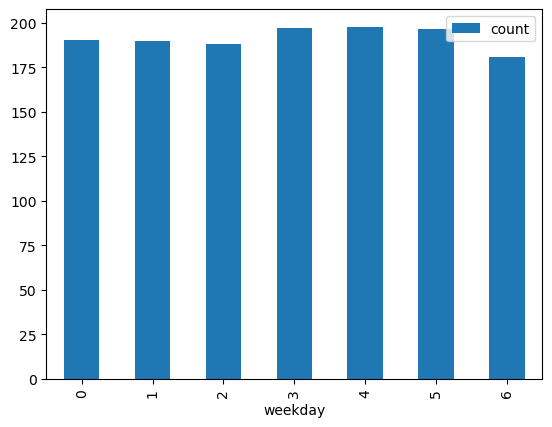

In [208]:
df.reset_index().plot.bar(x='weekday')
plt.show()

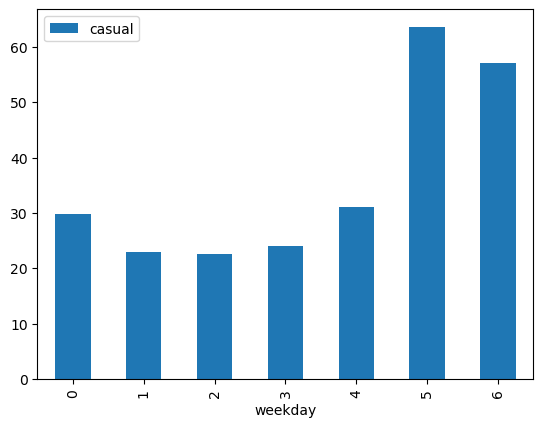

In [210]:
df=pd.DataFrame(gpb['casual'].mean())
df.reset_index().plot.bar(x='weekday')
plt.show()

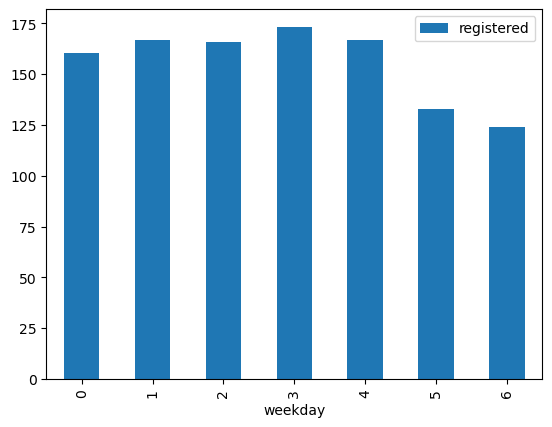

In [212]:
df=pd.DataFrame(gpb['registered'].mean())
df.reset_index().plot.bar(x='weekday')
plt.show()

***

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour_of_day,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,2011,1,1,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,2011,1,1,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,2011,1,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,2012,12,19,19,2
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,2012,12,19,20,2
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,2012,12,19,21,2
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,2012,12,19,22,2


In [220]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['registered']

In [221]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [222]:
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
params = {"max_features":[3,4,5,6,7]}
bagging = RandomForestRegressor(random_state=2023, n_jobs=-1)
gcv = GridSearchCV(bagging, param_grid=params,verbose=10, cv=kfold, scoring='r2',n_jobs=-1)
gcv.fit(X_train,y_train)

print(gcv.best_params_)
print(gcv.best_score_)
pd.DataFrame(gcv.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'max_features': 7}
0.9455733952296927


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.497116,0.526048,0.982422,0.407570,3,{'max_features': 3},0.835807,0.849380,0.848688,0.827259,0.847894,0.841806,0.008825,5
1,1.984831,0.705997,0.901871,0.966925,4,{'max_features': 4},0.885309,0.884968,0.892828,0.881325,0.887034,0.886293,0.003759,4
2,2.927077,0.023305,0.196087,0.052639,5,{'max_features': 5},0.915067,0.918859,0.917551,0.917458,0.923301,0.918447,0.002718,3
3,2.515719,0.389131,0.782940,0.374118,6,{'max_features': 6},0.936434,0.941016,0.933381,0.934306,0.935967,0.936221,0.002640,2
4,2.494132,0.908923,0.404762,0.374790,7,{'max_features': 7},0.946370,0.948749,0.941864,0.944355,0.946529,0.945573,0.002318,1


In [225]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['casual']

In [226]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [227]:
from sklearn.ensemble import RandomForestRegressor
kfold=KFold(n_splits=5, shuffle=True, random_state=2023)
params = {"max_features":[3,4,5,6,7]}
bagging = RandomForestRegressor(random_state=2023, n_jobs=-1)
gcv1 = GridSearchCV(bagging, param_grid=params,verbose=10, cv=kfold, scoring='r2',n_jobs=-1)
gcv1.fit(X_train,y_train)

print(gcv1.best_params_)
print(gcv1.best_score_)
pd.DataFrame(gcv1.cv_results_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits
{'max_features': 7}
0.9252065371570157


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,1.539486,0.695251,0.759355,0.619602,3,{'max_features': 3},0.913999,0.914626,0.905500,0.920327,0.902875,0.911466,0.006393,5
1,2.309042,0.165181,0.395367,0.347896,4,{'max_features': 4},0.922137,0.918975,0.912303,0.925353,0.913641,0.918482,0.004948,4
2,2.188713,0.260611,0.399365,0.191223,5,{'max_features': 5},0.927293,0.923544,0.915805,0.928431,0.913525,0.921720,0.006026,3
3,2.425174,0.223151,0.504703,0.144165,6,{'max_features': 6},0.927905,0.926691,0.916563,0.932940,0.917616,0.924343,0.006291,2
4,2.392393,0.812101,0.299824,0.477825,7,{'max_features': 7},0.930256,0.926539,0.917911,0.934078,0.917249,0.925207,0.006671,1


In [228]:
y_pred_reg=gcv.best_estimator_.predict(X_test)
y_pred_cas=gcv1.best_estimator_.predict(X_test)

In [229]:
sample = pd.read_csv("bike-sharing-demand/sampleSubmission.csv")
sample

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0
...,...,...
6488,2012-12-31 19:00:00,0
6489,2012-12-31 20:00:00,0
6490,2012-12-31 21:00:00,0
6491,2012-12-31 22:00:00,0


In [230]:
sample['count'] = y_pred_reg+y_pred_cas
sample

,datetime,count
0,2011-01-20 00:00:00,12.66
1,2011-01-20 01:00:00,7.22
2,2011-01-20 02:00:00,4.88
3,2011-01-20 03:00:00,3.35
4,2011-01-20 04:00:00,3.05
...,...,...
6488,2012-12-31 19:00:00,284.72
6489,2012-12-31 20:00:00,210.42
6490,2012-12-31 21:00:00,145.80
6491,2012-12-31 22:00:00,116.11


In [231]:
sample.to_csv('bike_submit.csv',index=False)

***
LGBM

In [232]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['registered']

In [233]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [234]:
lgbm=LGBMRegressor(random_state=2023)
lgbm.fit(X_train,y_train)

LGBMRegressor(random_state=2023)

In [237]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['casual']

In [238]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [239]:
lgbm1=LGBMRegressor(random_state=2023)
lgbm1.fit(X_train,y_train)

LGBMRegressor(random_state=2023)

In [240]:
y_pred_reg=lgbm.predict(X_test)
y_pred_cas=lgbm1.predict(X_test)

In [241]:
sample['count'] = y_pred_reg+y_pred_cas
sample

,datetime,count
0,2011-01-20 00:00:00,11.124879
1,2011-01-20 01:00:00,6.966269
2,2011-01-20 02:00:00,1.782807
3,2011-01-20 03:00:00,1.609781
4,2011-01-20 04:00:00,1.497027
...,...,...
6488,2012-12-31 19:00:00,332.984551
6489,2012-12-31 20:00:00,214.983261
6490,2012-12-31 21:00:00,160.608735
6491,2012-12-31 22:00:00,119.948076


In [243]:
sample.loc[sample['count']<0,'count']=0
sample

,datetime,count
0,2011-01-20 00:00:00,11.124879
1,2011-01-20 01:00:00,6.966269
2,2011-01-20 02:00:00,1.782807
3,2011-01-20 03:00:00,1.609781
4,2011-01-20 04:00:00,1.497027
...,...,...
6488,2012-12-31 19:00:00,332.984551
6489,2012-12-31 20:00:00,214.983261
6490,2012-12-31 21:00:00,160.608735
6491,2012-12-31 22:00:00,119.948076


In [244]:
sample.to_csv('bike_submit.csv',index=False)

***
XGBoost

In [245]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['registered']

In [246]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [ ]:
lgbm=XGBRegressor(random_state=2023)
lgbm.fit(X_train,y_train)

In [247]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['casual']

In [248]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [249]:
lgbm1=XGBRegressor(random_state=2023)
lgbm1.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
             grow_policy='depthwise', importance_type=None,
             interaction_constraints='', learning_rate=0.300000012, max_bin=256,
             max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
             max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=2023, ...)

In [250]:
y_pred_reg=lgbm.predict(X_test)
y_pred_cas=lgbm1.predict(X_test)

In [251]:
sample['count'] = y_pred_reg+y_pred_cas
sample

,datetime,count
0,2011-01-20 00:00:00,11.906597
1,2011-01-20 01:00:00,8.237387
2,2011-01-20 02:00:00,3.350022
3,2011-01-20 03:00:00,2.344934
4,2011-01-20 04:00:00,2.212505
...,...,...
6488,2012-12-31 19:00:00,335.734091
6489,2012-12-31 20:00:00,218.599693
6490,2012-12-31 21:00:00,163.031138
6491,2012-12-31 22:00:00,128.903513


In [252]:
sample.loc[sample['count']<0,'count']=0
sample

,datetime,count
0,2011-01-20 00:00:00,11.906597
1,2011-01-20 01:00:00,8.237387
2,2011-01-20 02:00:00,3.350022
3,2011-01-20 03:00:00,2.344934
4,2011-01-20 04:00:00,2.212505
...,...,...
6488,2012-12-31 19:00:00,335.734091
6489,2012-12-31 20:00:00,218.599693
6490,2012-12-31 21:00:00,163.031138
6491,2012-12-31 22:00:00,128.903513


In [253]:
sample.to_csv('bike_submit.csv',index=False)

***
Catboost

In [256]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['registered']

In [257]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [258]:
from catboost import CatBoostRegressor
lgbm=CatBoostRegressor(random_state=2023)
lgbm.fit(X_train,y_train)

C:\Users\dbda-lab\Anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.059704
0:	learn: 145.4436909	total: 153ms	remaining: 2m 33s
1:	learn: 140.2807231	total: 159ms	remaining: 1m 19s
2:	learn: 135.8237617	total: 165ms	remaining: 54.8s
3:	learn: 131.0996832	total: 171ms	remaining: 42.5s
4:	learn: 127.3818679	total: 176ms	remaining: 35.1s
5:	learn: 123.6259268	total: 179ms	remaining: 29.7s
6:	learn: 120.1574749	total: 182ms	remaining: 25.8s
7:	learn: 116.7463984	total: 184ms	remaining: 22.8s
8:	learn: 114.1445430	total: 187ms	remaining: 20.6s
9:	learn: 111.3908581	total: 189ms	remaining: 18.8s
10:	learn: 108.5187243	total: 192ms	remaining: 17.3s
11:	learn: 106.2509624	total: 195ms	remaining: 16s
12:	learn: 102.8240710	total: 197ms	remaining: 15s
13:	learn: 100.3190021	total: 200ms	remaining: 14.1s
14:	learn: 97.1672941	total: 203ms	remaining: 13.3s
15:	learn: 95.6375342	total: 205ms	remaining: 12.6s
16:	learn: 94.1873504	total: 208ms	remaining: 12s
17:	learn: 91.5176149	total: 210ms	remaining: 11.5s
18:	learn: 90.2897873	total: 212ms

192:	learn: 35.0392244	total: 582ms	remaining: 2.43s
193:	learn: 35.0086553	total: 584ms	remaining: 2.43s
194:	learn: 34.9467763	total: 587ms	remaining: 2.42s
195:	learn: 34.9006742	total: 589ms	remaining: 2.42s
196:	learn: 34.8648072	total: 591ms	remaining: 2.41s
197:	learn: 34.8146705	total: 593ms	remaining: 2.4s
198:	learn: 34.7723475	total: 595ms	remaining: 2.4s
199:	learn: 34.7325029	total: 597ms	remaining: 2.39s
200:	learn: 34.6822270	total: 599ms	remaining: 2.38s
201:	learn: 34.6078722	total: 602ms	remaining: 2.38s
202:	learn: 34.5688574	total: 604ms	remaining: 2.37s
203:	learn: 34.5174065	total: 607ms	remaining: 2.37s
204:	learn: 34.4835258	total: 609ms	remaining: 2.36s
205:	learn: 34.4512401	total: 611ms	remaining: 2.35s
206:	learn: 34.4080114	total: 613ms	remaining: 2.35s
207:	learn: 34.3608730	total: 615ms	remaining: 2.34s
208:	learn: 34.3346252	total: 617ms	remaining: 2.34s
209:	learn: 34.3012761	total: 620ms	remaining: 2.33s
210:	learn: 34.2308814	total: 622ms	remaining: 2

378:	learn: 29.4082696	total: 976ms	remaining: 1.6s
379:	learn: 29.3942040	total: 979ms	remaining: 1.6s
380:	learn: 29.3781198	total: 981ms	remaining: 1.59s
381:	learn: 29.3490334	total: 983ms	remaining: 1.59s
382:	learn: 29.3405627	total: 985ms	remaining: 1.59s
383:	learn: 29.3289957	total: 987ms	remaining: 1.58s
384:	learn: 29.3121232	total: 989ms	remaining: 1.58s
385:	learn: 29.2948578	total: 992ms	remaining: 1.58s
386:	learn: 29.2678814	total: 994ms	remaining: 1.57s
387:	learn: 29.2471572	total: 996ms	remaining: 1.57s
388:	learn: 29.2298042	total: 998ms	remaining: 1.57s
389:	learn: 29.2147808	total: 1s	remaining: 1.56s
390:	learn: 29.1943073	total: 1s	remaining: 1.56s
391:	learn: 29.1744873	total: 1s	remaining: 1.56s
392:	learn: 29.1501671	total: 1.01s	remaining: 1.55s
393:	learn: 29.1268814	total: 1.01s	remaining: 1.55s
394:	learn: 29.1047962	total: 1.01s	remaining: 1.55s
395:	learn: 29.0841131	total: 1.01s	remaining: 1.55s
396:	learn: 29.0685027	total: 1.01s	remaining: 1.54s
397:

555:	learn: 26.6908281	total: 1.35s	remaining: 1.08s
556:	learn: 26.6735327	total: 1.35s	remaining: 1.08s
557:	learn: 26.6548910	total: 1.36s	remaining: 1.07s
558:	learn: 26.6444687	total: 1.36s	remaining: 1.07s
559:	learn: 26.6296260	total: 1.36s	remaining: 1.07s
560:	learn: 26.6192017	total: 1.36s	remaining: 1.07s
561:	learn: 26.6129665	total: 1.37s	remaining: 1.06s
562:	learn: 26.6009428	total: 1.37s	remaining: 1.06s
563:	learn: 26.5927221	total: 1.37s	remaining: 1.06s
564:	learn: 26.5878813	total: 1.37s	remaining: 1.06s
565:	learn: 26.5706381	total: 1.37s	remaining: 1.05s
566:	learn: 26.5588043	total: 1.38s	remaining: 1.05s
567:	learn: 26.5532922	total: 1.38s	remaining: 1.05s
568:	learn: 26.5403612	total: 1.38s	remaining: 1.05s
569:	learn: 26.5264368	total: 1.38s	remaining: 1.04s
570:	learn: 26.5136419	total: 1.39s	remaining: 1.04s
571:	learn: 26.5001486	total: 1.39s	remaining: 1.04s
572:	learn: 26.4916586	total: 1.39s	remaining: 1.03s
573:	learn: 26.4811174	total: 1.39s	remaining:

742:	learn: 24.7879549	total: 1.74s	remaining: 604ms
743:	learn: 24.7851984	total: 1.75s	remaining: 601ms
744:	learn: 24.7738564	total: 1.75s	remaining: 599ms
745:	learn: 24.7691562	total: 1.75s	remaining: 596ms
746:	learn: 24.7624864	total: 1.75s	remaining: 594ms
747:	learn: 24.7547294	total: 1.76s	remaining: 592ms
748:	learn: 24.7495434	total: 1.76s	remaining: 589ms
749:	learn: 24.7447588	total: 1.76s	remaining: 587ms
750:	learn: 24.7376174	total: 1.76s	remaining: 584ms
751:	learn: 24.7176122	total: 1.76s	remaining: 582ms
752:	learn: 24.7106677	total: 1.77s	remaining: 580ms
753:	learn: 24.7043710	total: 1.77s	remaining: 577ms
754:	learn: 24.6976710	total: 1.77s	remaining: 575ms
755:	learn: 24.6911034	total: 1.77s	remaining: 572ms
756:	learn: 24.6898808	total: 1.77s	remaining: 570ms
757:	learn: 24.6804689	total: 1.78s	remaining: 567ms
758:	learn: 24.6741032	total: 1.78s	remaining: 565ms
759:	learn: 24.6564489	total: 1.78s	remaining: 563ms
760:	learn: 24.6510636	total: 1.78s	remaining:

925:	learn: 23.4076181	total: 2.14s	remaining: 171ms
926:	learn: 23.3968721	total: 2.14s	remaining: 169ms
927:	learn: 23.3943772	total: 2.14s	remaining: 166ms
928:	learn: 23.3892933	total: 2.15s	remaining: 164ms
929:	learn: 23.3773670	total: 2.15s	remaining: 162ms
930:	learn: 23.3730384	total: 2.15s	remaining: 159ms
931:	learn: 23.3623317	total: 2.15s	remaining: 157ms
932:	learn: 23.3512098	total: 2.15s	remaining: 155ms
933:	learn: 23.3468362	total: 2.16s	remaining: 152ms
934:	learn: 23.3431648	total: 2.16s	remaining: 150ms
935:	learn: 23.3389570	total: 2.16s	remaining: 148ms
936:	learn: 23.3332048	total: 2.16s	remaining: 145ms
937:	learn: 23.3208817	total: 2.17s	remaining: 143ms
938:	learn: 23.3175822	total: 2.17s	remaining: 141ms
939:	learn: 23.3126123	total: 2.17s	remaining: 138ms
940:	learn: 23.3088669	total: 2.17s	remaining: 136ms
941:	learn: 23.3053515	total: 2.17s	remaining: 134ms
942:	learn: 23.2993402	total: 2.18s	remaining: 132ms
943:	learn: 23.2992397	total: 2.18s	remaining:

In [259]:
X_train=bike.drop(['datetime','count','casual','registered'],axis=1)
X_test=bike_test.drop('datetime',axis=1)
y_train = bike['casual']

In [260]:
X_train = pd.get_dummies(X_train)
X_test= pd.get_dummies(X_test)

C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:1: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_train = pd.get_dummies(X_train)
C:\Users\dbda-lab\AppData\Local\Temp\ipykernel_12724\4063682669.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  X_test= pd.get_dummies(X_test)


In [261]:
lgbm1=CatBoostRegressor(random_state=2023)
lgbm1.fit(X_train,y_train)

C:\Users\dbda-lab\Anaconda3\lib\site-packages\catboost\core.py:1411: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,


Learning rate set to 0.059704
0:	learn: 47.8137289	total: 11.9ms	remaining: 11.9s
1:	learn: 45.8777581	total: 23.2ms	remaining: 11.6s
2:	learn: 44.1629078	total: 27.5ms	remaining: 9.13s
3:	learn: 42.4504933	total: 31.5ms	remaining: 7.84s
4:	learn: 40.8473701	total: 35.7ms	remaining: 7.1s
5:	learn: 39.3714483	total: 39.8ms	remaining: 6.59s
6:	learn: 38.0122308	total: 43.4ms	remaining: 6.16s
7:	learn: 36.7501274	total: 47.1ms	remaining: 5.84s
8:	learn: 35.5108380	total: 51.3ms	remaining: 5.65s
9:	learn: 34.4581210	total: 53.6ms	remaining: 5.31s
10:	learn: 33.3723707	total: 55.7ms	remaining: 5.01s
11:	learn: 32.3228751	total: 57.9ms	remaining: 4.76s
12:	learn: 31.4352021	total: 60ms	remaining: 4.56s
13:	learn: 30.6092378	total: 62.1ms	remaining: 4.37s
14:	learn: 29.8608855	total: 64.3ms	remaining: 4.22s
15:	learn: 29.0539447	total: 66.4ms	remaining: 4.08s
16:	learn: 28.4000072	total: 68.4ms	remaining: 3.96s
17:	learn: 27.7860667	total: 70.5ms	remaining: 3.85s
18:	learn: 27.2123123	total: 

167:	learn: 14.7903589	total: 382ms	remaining: 1.89s
168:	learn: 14.7626973	total: 385ms	remaining: 1.89s
169:	learn: 14.7453851	total: 387ms	remaining: 1.89s
170:	learn: 14.7279807	total: 389ms	remaining: 1.89s
171:	learn: 14.7048466	total: 391ms	remaining: 1.88s
172:	learn: 14.6906331	total: 393ms	remaining: 1.88s
173:	learn: 14.6598373	total: 396ms	remaining: 1.88s
174:	learn: 14.6425842	total: 398ms	remaining: 1.87s
175:	learn: 14.6254987	total: 400ms	remaining: 1.87s
176:	learn: 14.6076593	total: 402ms	remaining: 1.87s
177:	learn: 14.5878263	total: 404ms	remaining: 1.87s
178:	learn: 14.5484842	total: 407ms	remaining: 1.86s
179:	learn: 14.5348000	total: 409ms	remaining: 1.86s
180:	learn: 14.5086007	total: 411ms	remaining: 1.86s
181:	learn: 14.4926415	total: 413ms	remaining: 1.86s
182:	learn: 14.4585515	total: 416ms	remaining: 1.85s
183:	learn: 14.4209555	total: 418ms	remaining: 1.85s
184:	learn: 14.4038290	total: 420ms	remaining: 1.85s
185:	learn: 14.3873705	total: 422ms	remaining:

346:	learn: 12.1675968	total: 774ms	remaining: 1.46s
347:	learn: 12.1522809	total: 777ms	remaining: 1.46s
348:	learn: 12.1420721	total: 780ms	remaining: 1.45s
349:	learn: 12.1245610	total: 782ms	remaining: 1.45s
350:	learn: 12.1161161	total: 784ms	remaining: 1.45s
351:	learn: 12.1069166	total: 786ms	remaining: 1.45s
352:	learn: 12.0956302	total: 788ms	remaining: 1.44s
353:	learn: 12.0914372	total: 790ms	remaining: 1.44s
354:	learn: 12.0816485	total: 792ms	remaining: 1.44s
355:	learn: 12.0737015	total: 795ms	remaining: 1.44s
356:	learn: 12.0567911	total: 797ms	remaining: 1.44s
357:	learn: 12.0523056	total: 799ms	remaining: 1.43s
358:	learn: 12.0416828	total: 801ms	remaining: 1.43s
359:	learn: 12.0382603	total: 804ms	remaining: 1.43s
360:	learn: 12.0333707	total: 807ms	remaining: 1.43s
361:	learn: 12.0234784	total: 811ms	remaining: 1.43s
362:	learn: 12.0203350	total: 813ms	remaining: 1.43s
363:	learn: 12.0171674	total: 816ms	remaining: 1.43s
364:	learn: 12.0102665	total: 819ms	remaining:

523:	learn: 10.9565382	total: 1.17s	remaining: 1.06s
524:	learn: 10.9553298	total: 1.17s	remaining: 1.06s
525:	learn: 10.9512782	total: 1.17s	remaining: 1.05s
526:	learn: 10.9454966	total: 1.17s	remaining: 1.05s
527:	learn: 10.9396389	total: 1.18s	remaining: 1.05s
528:	learn: 10.9360230	total: 1.18s	remaining: 1.05s
529:	learn: 10.9320655	total: 1.18s	remaining: 1.05s
530:	learn: 10.9288551	total: 1.18s	remaining: 1.04s
531:	learn: 10.9242537	total: 1.19s	remaining: 1.04s
532:	learn: 10.9198157	total: 1.19s	remaining: 1.04s
533:	learn: 10.9151026	total: 1.19s	remaining: 1.04s
534:	learn: 10.9057224	total: 1.19s	remaining: 1.03s
535:	learn: 10.9024651	total: 1.19s	remaining: 1.03s
536:	learn: 10.8963591	total: 1.2s	remaining: 1.03s
537:	learn: 10.8882696	total: 1.2s	remaining: 1.03s
538:	learn: 10.8831963	total: 1.2s	remaining: 1.03s
539:	learn: 10.8813205	total: 1.2s	remaining: 1.02s
540:	learn: 10.8779077	total: 1.21s	remaining: 1.02s
541:	learn: 10.8723203	total: 1.21s	remaining: 1.0

708:	learn: 10.1442578	total: 1.56s	remaining: 640ms
709:	learn: 10.1400687	total: 1.56s	remaining: 638ms
710:	learn: 10.1351286	total: 1.56s	remaining: 635ms
711:	learn: 10.1320169	total: 1.56s	remaining: 633ms
712:	learn: 10.1284111	total: 1.57s	remaining: 631ms
713:	learn: 10.1242605	total: 1.57s	remaining: 629ms
714:	learn: 10.1225336	total: 1.57s	remaining: 626ms
715:	learn: 10.1189319	total: 1.57s	remaining: 624ms
716:	learn: 10.1162841	total: 1.58s	remaining: 622ms
717:	learn: 10.1128209	total: 1.58s	remaining: 620ms
718:	learn: 10.1080290	total: 1.58s	remaining: 618ms
719:	learn: 10.1050549	total: 1.58s	remaining: 616ms
720:	learn: 10.1002074	total: 1.58s	remaining: 613ms
721:	learn: 10.0968633	total: 1.59s	remaining: 611ms
722:	learn: 10.0932638	total: 1.59s	remaining: 609ms
723:	learn: 10.0902875	total: 1.59s	remaining: 607ms
724:	learn: 10.0870103	total: 1.59s	remaining: 605ms
725:	learn: 10.0854043	total: 1.6s	remaining: 602ms
726:	learn: 10.0827475	total: 1.6s	remaining: 6

881:	learn: 9.5895018	total: 1.95s	remaining: 261ms
882:	learn: 9.5843141	total: 1.95s	remaining: 259ms
883:	learn: 9.5808550	total: 1.95s	remaining: 256ms
884:	learn: 9.5771709	total: 1.96s	remaining: 254ms
885:	learn: 9.5744072	total: 1.96s	remaining: 252ms
886:	learn: 9.5732829	total: 1.96s	remaining: 250ms
887:	learn: 9.5706788	total: 1.96s	remaining: 247ms
888:	learn: 9.5689131	total: 1.96s	remaining: 245ms
889:	learn: 9.5650051	total: 1.97s	remaining: 243ms
890:	learn: 9.5619412	total: 1.97s	remaining: 241ms
891:	learn: 9.5578454	total: 1.97s	remaining: 239ms
892:	learn: 9.5556654	total: 1.97s	remaining: 236ms
893:	learn: 9.5538173	total: 1.98s	remaining: 234ms
894:	learn: 9.5513240	total: 1.98s	remaining: 232ms
895:	learn: 9.5462259	total: 1.98s	remaining: 230ms
896:	learn: 9.5442744	total: 1.98s	remaining: 228ms
897:	learn: 9.5396840	total: 1.98s	remaining: 225ms
898:	learn: 9.5364377	total: 1.99s	remaining: 223ms
899:	learn: 9.5330639	total: 1.99s	remaining: 221ms
900:	learn: 

In [262]:
y_pred_reg=lgbm.predict(X_test)
y_pred_cas=lgbm1.predict(X_test)

In [263]:
sample['count'] = y_pred_reg+y_pred_cas
sample

,datetime,count
0,2011-01-20 00:00:00,11.589683
1,2011-01-20 01:00:00,-1.128210
2,2011-01-20 02:00:00,-3.455789
3,2011-01-20 03:00:00,-0.895375
4,2011-01-20 04:00:00,-0.402152
...,...,...
6488,2012-12-31 19:00:00,319.903605
6489,2012-12-31 20:00:00,220.166349
6490,2012-12-31 21:00:00,150.879665
6491,2012-12-31 22:00:00,102.694386


In [264]:
sample.loc[sample['count']<0,'count']=0
sample

,datetime,count
0,2011-01-20 00:00:00,11.589683
1,2011-01-20 01:00:00,0.000000
2,2011-01-20 02:00:00,0.000000
3,2011-01-20 03:00:00,0.000000
4,2011-01-20 04:00:00,0.000000
...,...,...
6488,2012-12-31 19:00:00,319.903605
6489,2012-12-31 20:00:00,220.166349
6490,2012-12-31 21:00:00,150.879665
6491,2012-12-31 22:00:00,102.694386


In [265]:
sample.to_csv('bike_submit.csv',index=False)

# UNSUPERVISED LEARNING #

## CLUSTERING ##

Clustering is the task of dividing the population or data points into a number of groups such that data points in the same groups are more similar to other data points in the same group and dissimilar to the data points in other groups. It is basically a collection of objects on the basis of similarity and dissimilarity between them. 

For ex– The data points in the graph below clustered together can be classified into one single group. We can distinguish the clusters, and we can identify that there are 3 clusters in the below picture. 

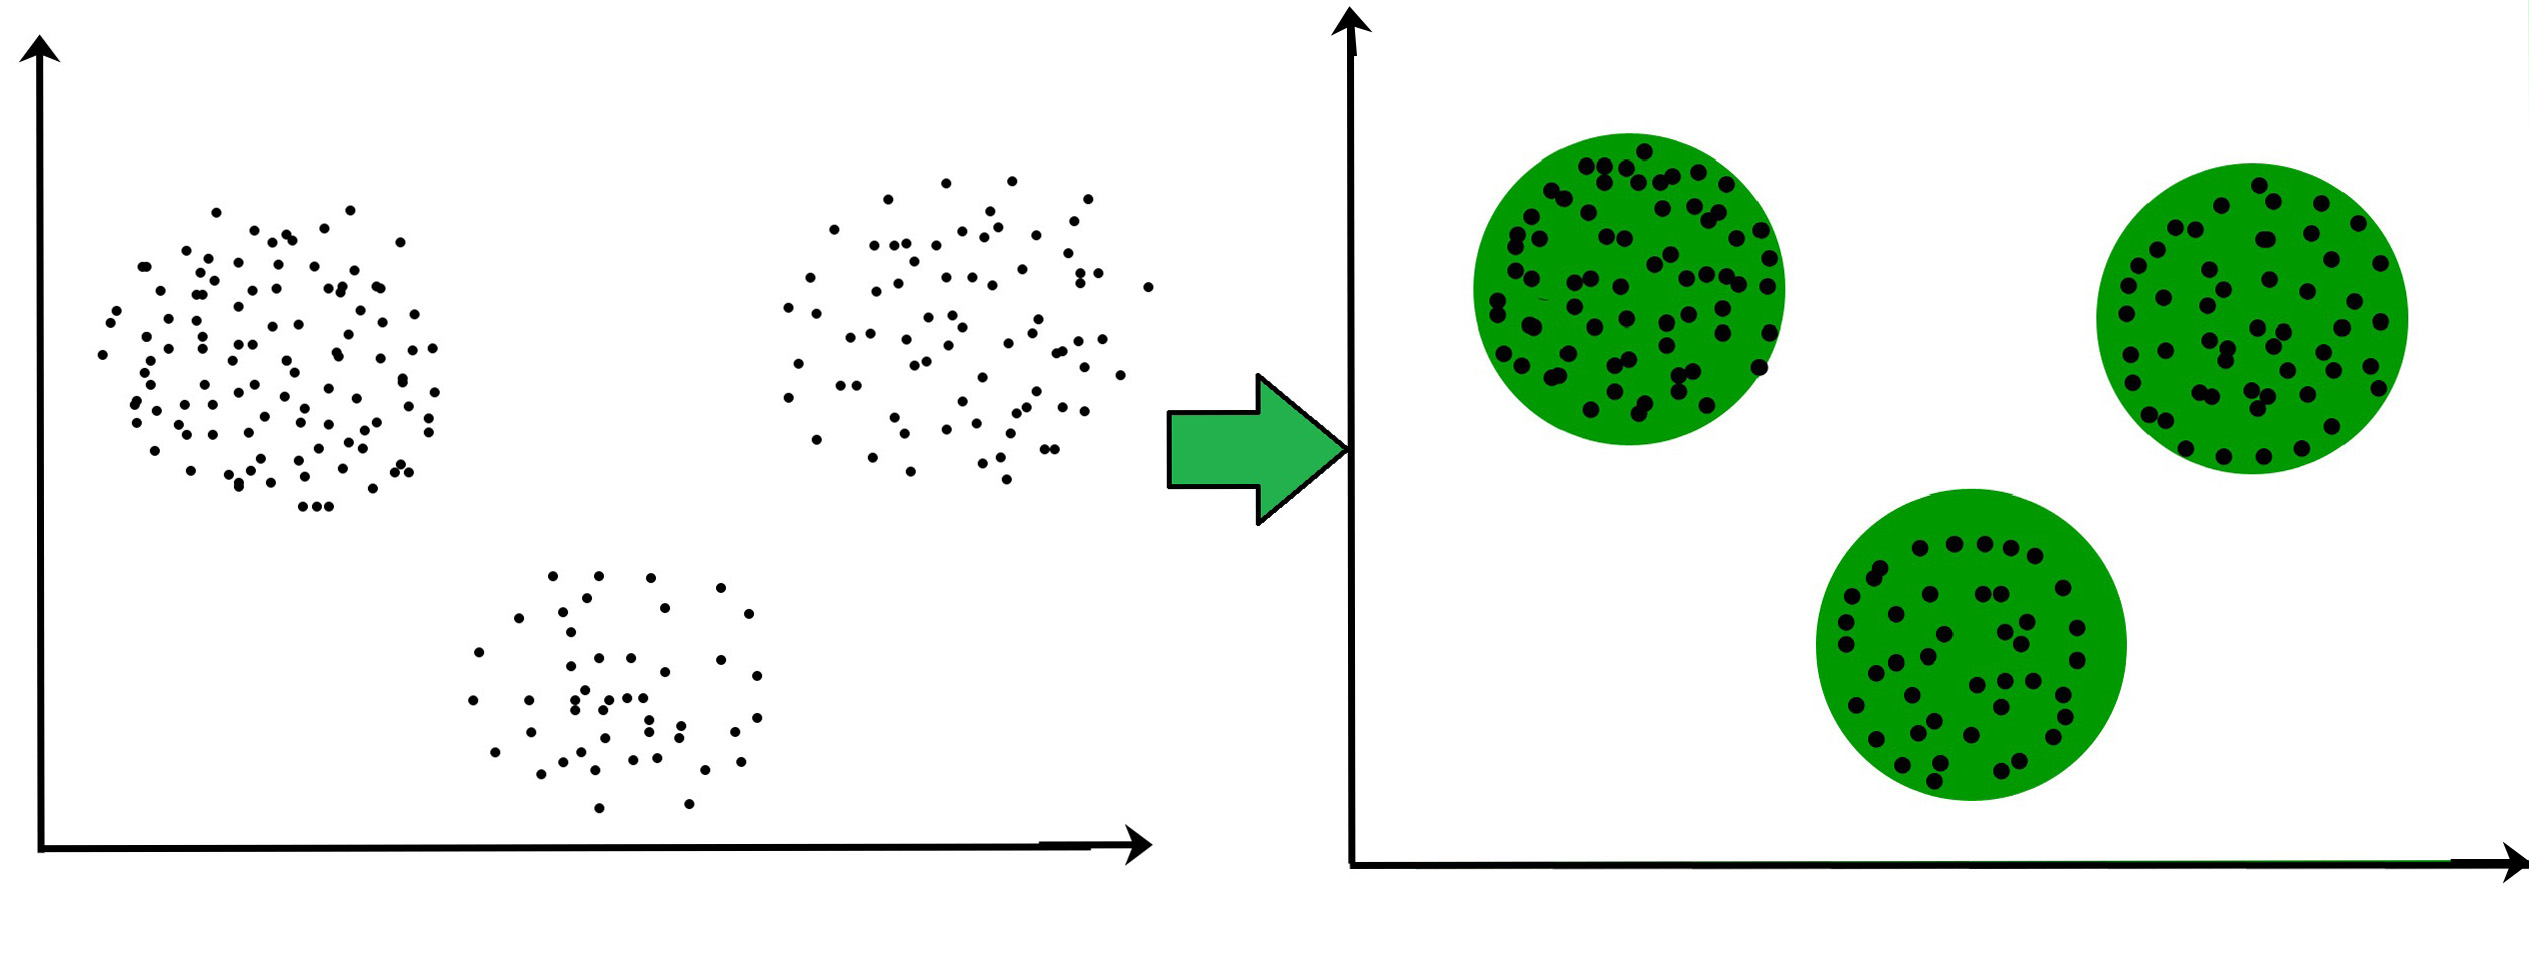

It is not necessary for clusters to be spherical. Such as : 

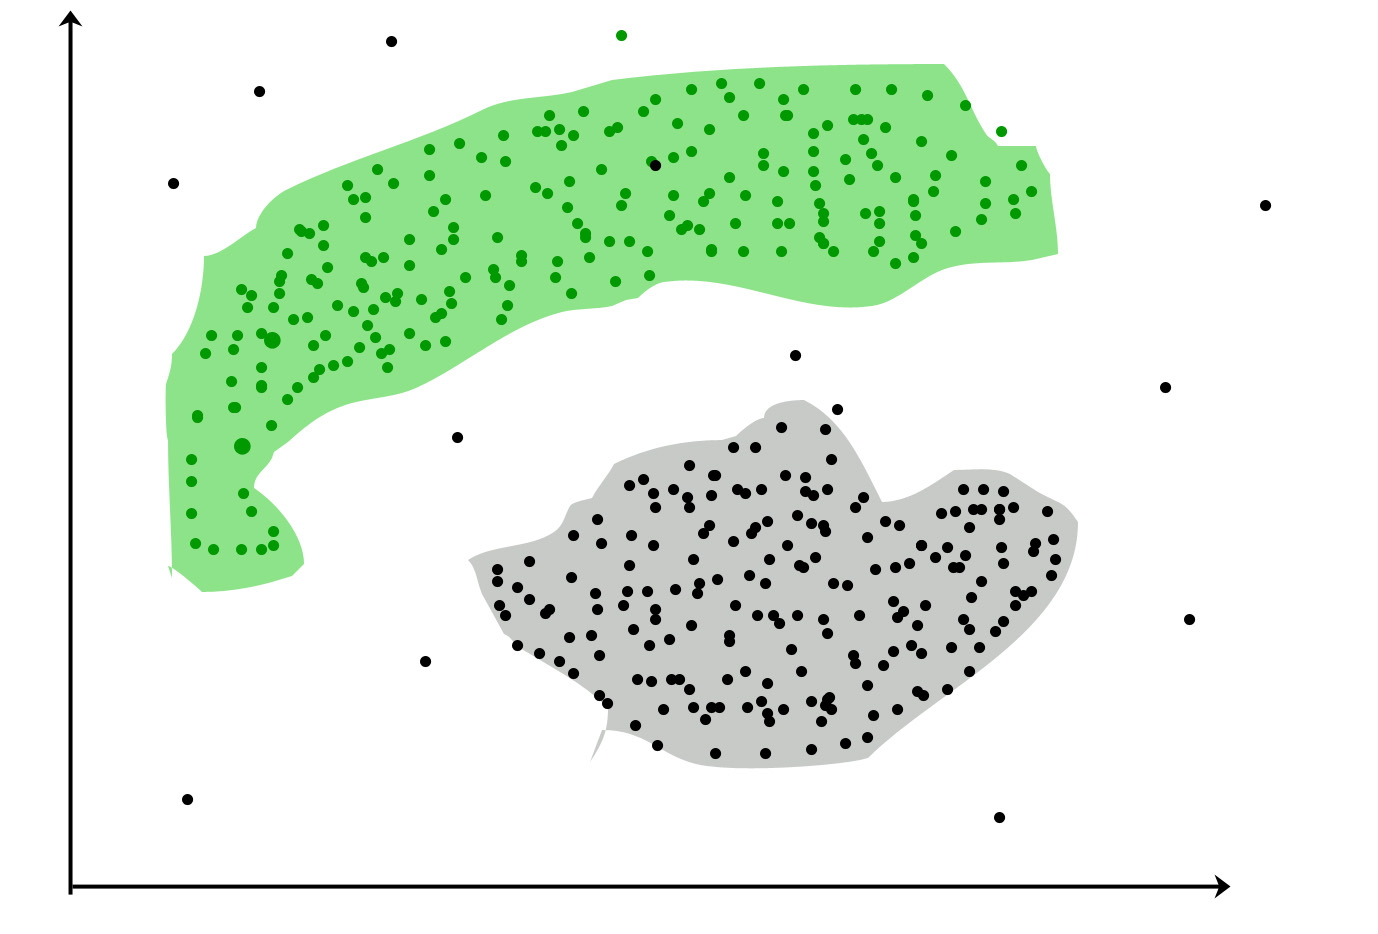

Clustering can serve as inputs to other analysis


Scaling will be required(good) for all scaling algorithms.

Clustering Methods : 

- Density-Based Methods: These methods consider the clusters as the dense region having some similarities and differences from the lower dense region of the space. These methods have good accuracy and the ability to merge two clusters. Example DBSCAN (Density-Based Spatial Clustering of Applications with Noise), OPTICS (Ordering Points to Identify Clustering Structure), etc.

- Hierarchical Based Methods: The clusters formed in this method form a tree-type structure based on the hierarchy. New clusters are formed using the previously formed one. It is divided into two category 
    - Agglomerative (bottom-up approach)
    - Divisive (top-down approach)

Distance between closest points in two clusters is called **single linkage**.


Distance between farthest points in two clusters is called **complete linkage**.

Distance between centre points in two clusters is called **centroid linkage**.

1. **Single Linkage**: For two clusters R and S, the single linkage returns the minimum distance between two points i and j such that i belongs to R and j belongs to S.
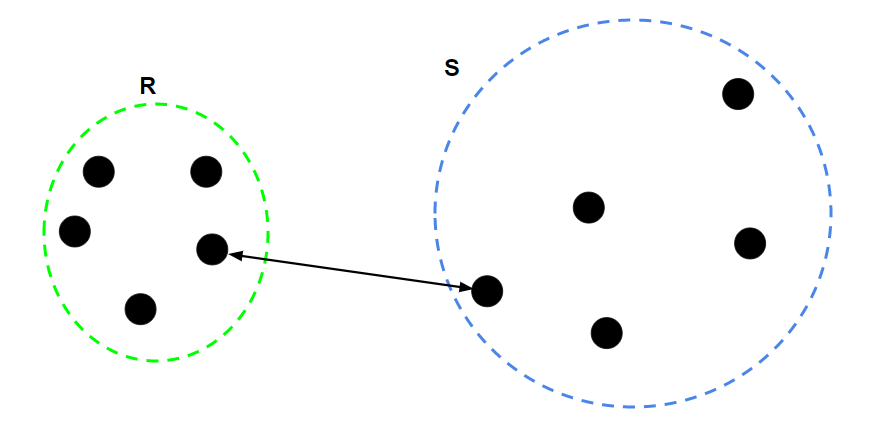



2. **Complete Linkage**: For two clusters R and S, the complete linkage returns the maximum distance between two points i and j such that i belongs to R and j belongs to S.

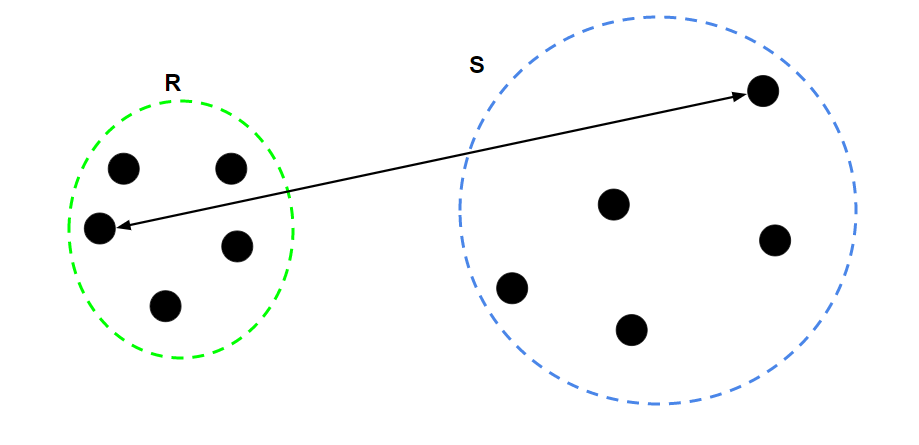

3. Average Linkage: For two clusters R and S, first for the distance between any data-point i in R and any data-point j in S and then the arithmetic mean of these distances are calculated. Average Linkage returns this value of the arithmetic mean.


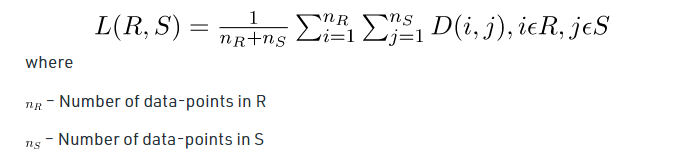

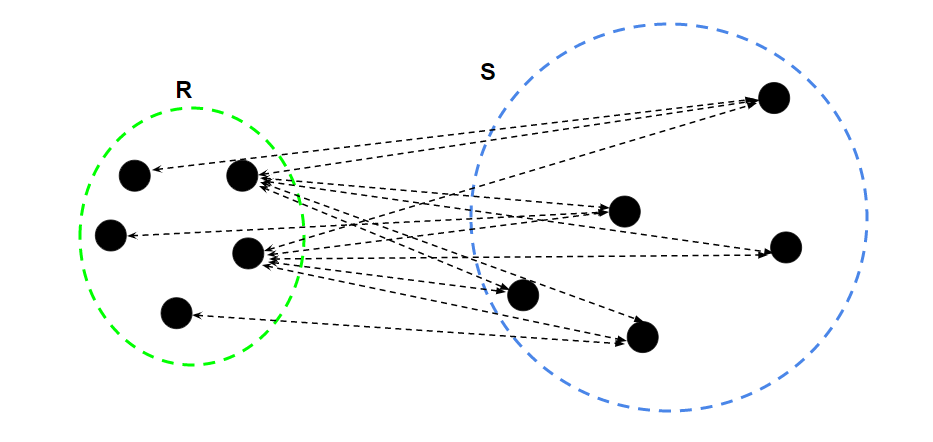

###  Agglomerative Clustering ###

Also known as bottom-up approach or hierarchical agglomerative clustering (HAC). A structure that is more informative than the unstructured set of clusters returned by flat clustering. This clustering algorithm does not require us to prespecify the number of clusters. Bottom-up algorithms treat each data as a singleton cluster at the outset and then successively agglomerates pairs of clusters until all clusters have been merged into a single cluster that contains all data. 

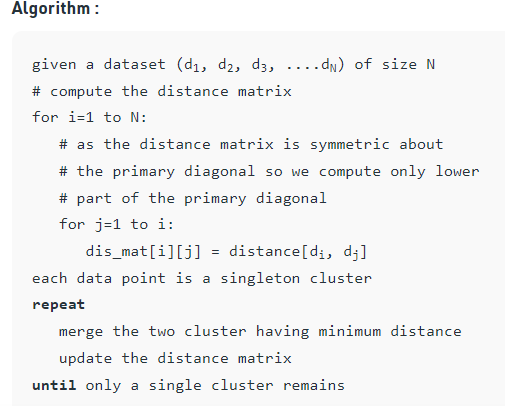

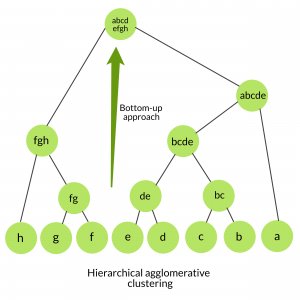

In [266]:
from scipy.cluster.hierarchy import linkage,dendrogram

In [270]:
milk=pd.read_csv("milk.csv",index_col=0)
milk.head(5)

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [271]:
scaler=StandardScaler()
mil_scaled=scaler.fit_transform(milk)

In [273]:
mergings=linkage(mil_scaled,method='average')

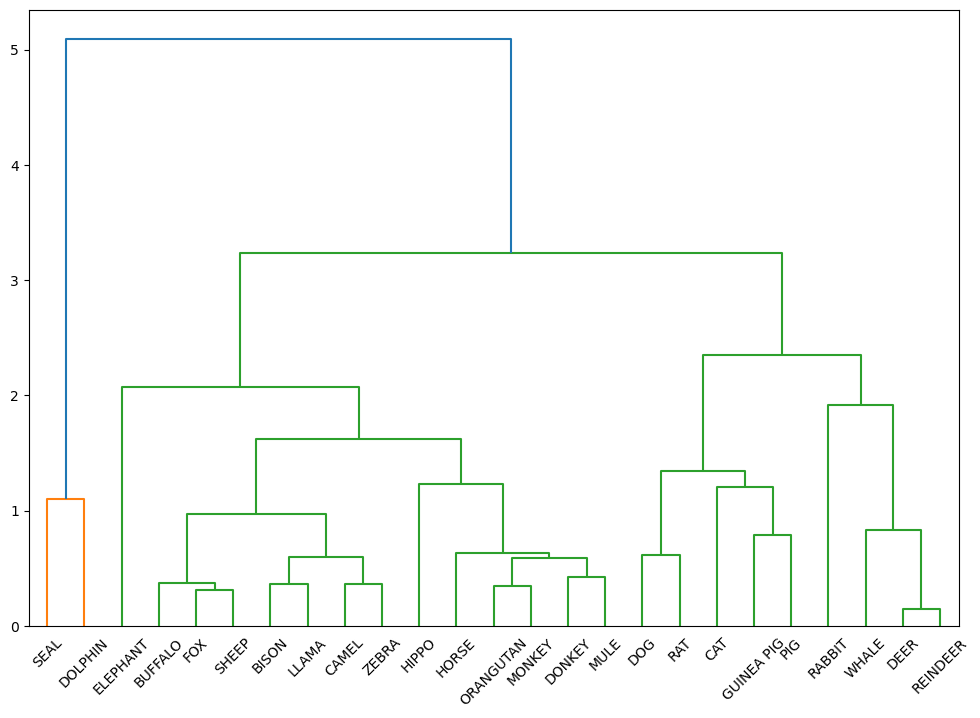

In [276]:
plt.figure(figsize=(12,8))
ax=dendrogram(mergings,labels=np.array(milk.index),leaf_rotation=45,leaf_font_size=10)
plt.show()

Hierarchical clustering is often not used due to drawbacks

### K-Means Clustering ###

The algorithm works as follows:  

1. First, we initialize k points, called means or cluster centroids, randomly.
2. We categorize each item to its closest mean and we update the mean’s coordinates, which are the averages of the items categorized in that cluster so far.
3. We repeat the process for a given number of iterations and at the end, we have our clusters.

In [279]:
from sklearn.cluster import KMeans

In [277]:
milk=pd.read_csv("milk.csv",index_col=0)
milk.head(5)

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [278]:
scaler=StandardScaler()
mil_scaled=scaler.fit_transform(milk)

In [281]:
kmeans= KMeans(n_clusters=5,random_state=2023)
kmeans.fit(mil_scaled)

C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\dbda-lab\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=5, random_state=2023)

In [284]:
labels =kmeans.predict(mil_scaled)
print(labels)

[1 1 1 1 1 2 2 2 3 3 2 2 1 3 2 2 3 2 0 0 0 0 0 4 4]


In [285]:
milk['Cluster']=labels

In [286]:
milk

,water,protein,fat,lactose,ash,Cluster
Animal,,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35,1
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,1
MONKEY,88.4,2.2,2.7,6.4,0.18,1
DONKEY,90.3,1.7,1.4,6.2,0.40,1
HIPPO,90.4,0.6,4.5,4.4,0.10,1
CAMEL,87.7,3.5,3.4,4.8,0.71,2
BISON,86.9,4.8,1.7,5.7,0.90,2
BUFFALO,82.1,5.9,7.9,4.7,0.78,2
GUINEA PIG,81.9,7.4,7.2,2.7,0.85,3


The no of clusters can be tuned using the following metrics-
- WSS (Within Sums of Squares)
- 

For the above model, WSS =

In [291]:
import warnings
warnings.filterwarnings("ignore")
for i in range(2,25):
    kmeans= KMeans(n_clusters=i,random_state=2023)
    kmeans.fit(mil_scaled)
    print(f"THe WSS value of {i}-means cluster is = {kmeans.inertia_}")

THe WSS value of 2-means cluster is = 49.854659507364545
THe WSS value of 3-means cluster is = 30.82263113142807
THe WSS value of 4-means cluster is = 18.493970123821068
THe WSS value of 5-means cluster is = 13.448822915729098
THe WSS value of 6-means cluster is = 10.5869199725641
THe WSS value of 7-means cluster is = 7.851896173099098
THe WSS value of 8-means cluster is = 6.075610486828869
THe WSS value of 9-means cluster is = 4.883255641982216
THe WSS value of 10-means cluster is = 3.693504511122214
THe WSS value of 11-means cluster is = 2.8322257978028373
THe WSS value of 12-means cluster is = 2.2211447871411174
THe WSS value of 13-means cluster is = 1.9029462162564301
THe WSS value of 14-means cluster is = 1.4448645847194785
THe WSS value of 15-means cluster is = 1.1350764691837605
THe WSS value of 16-means cluster is = 0.8229591719073737
THe WSS value of 17-means cluster is = 0.6033195815303162
THe WSS value of 18-means cluster is = 0.4161930198751282
THe WSS value of 19-means clu

While the value of WSS decreases as the number of clusters, increase it makes no sense to have 24 clusters, since there are 25 data points. So we take upto 10.

In [310]:
import warnings
warnings.filterwarnings("ignore")
wss={}
for i in range(2,10):
    kmeans= KMeans(n_clusters=i,random_state=2023)
    kmeans.fit(mil_scaled)
    wss.update({str(i)+'-means':kmeans.inertia_})

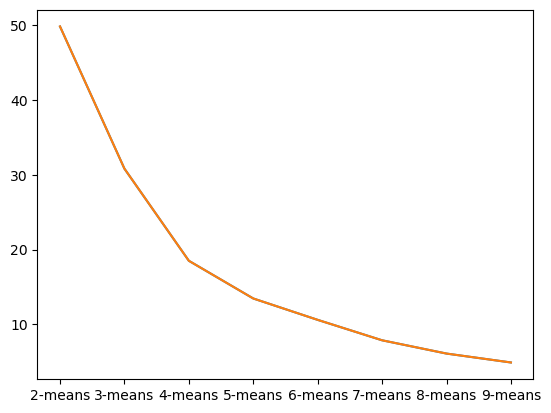

In [313]:
pd.Series(wss).plot(grid=T)
plt.show()

From above graph, we select the value of k at the “elbow” ie the point after which the distortion/inertia start decreasing in a linear fashion. We find from above graph that, it is 4-means for out data, hence we taje K value = 4

Elbow point example :

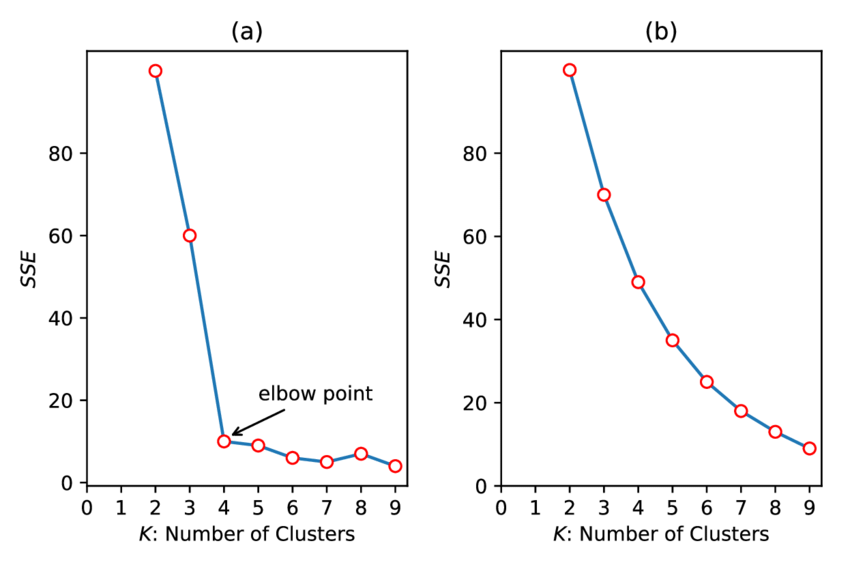

In [316]:
milk=pd.read_csv("milk.csv",index_col=0)
milk.head(5)
scaler=StandardScaler()
mil_scaled=scaler.fit_transform(milk)
kmeans= KMeans(n_clusters=4,random_state=2023)
kmeans.fit(mil_scaled)

KMeans(n_clusters=4, random_state=2023)

In [317]:
milk['Cluster']=labels

In [319]:
milk=milk.sort_values(by='Cluster')
milk

,water,protein,fat,lactose,ash,Cluster
Animal,,,,,,
WHALE,64.8,11.1,21.2,1.6,1.70,0
REINDEER,64.8,10.7,20.3,2.5,1.40,0
DEER,65.9,10.4,19.7,2.6,1.40,0
RAT,72.5,9.2,12.6,3.3,1.40,0
RABBIT,71.3,12.3,13.1,1.9,2.30,0
HORSE,90.1,2.6,1.0,6.9,0.35,1
MULE,90.0,2.0,1.8,5.5,0.47,1
ORANGUTAN,88.5,1.4,3.5,6.0,0.24,1
MONKEY,88.4,2.2,2.7,6.4,0.18,1


In [314]:
milk.groupby('Cluster').mean()

,water,protein,fat,lactose,ash
Cluster,,,,,
0,67.860000,10.7400,17.380000,2.3800,1.640
1,89.616667,1.7500,2.483333,5.9000,0.290
2,82.962500,4.6125,6.362500,5.1625,0.795
3,80.650000,8.4750,7.025000,3.4500,0.975
4,45.650000,10.1500,38.450000,0.4500,0.690


***
**Nutrient Dataset**

In [321]:
nutrient=pd.read_csv("nutrient.csv",index_col=0)
nutrient.head(5)

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7


In [322]:
scaler=StandardScaler()
nut_scaled=scaler.fit_transform(nutrient)

In [323]:
import warnings
warnings.filterwarnings("ignore")
wss={}
for i in range(2,10):
    kmeans= KMeans(n_clusters=i,random_state=2023)
    kmeans.fit(nut_scaled)
    wss.update({str(i)+'-means':kmeans.inertia_})

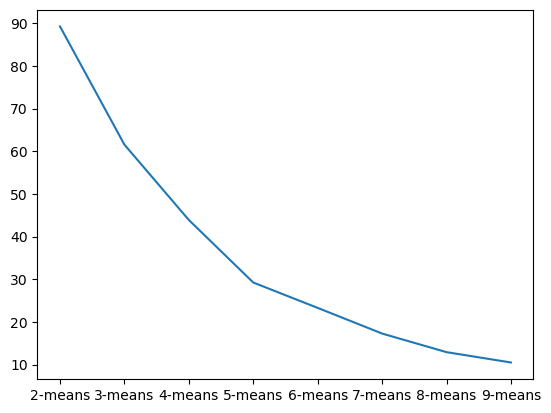

In [324]:
pd.Series(wss).plot()
plt.show()

In [326]:
kmeans= KMeans(n_clusters=5,random_state=2023)
kmeans.fit(nut_scaled)

KMeans(n_clusters=5, random_state=2023)

In [328]:
labels =kmeans.predict(nut_scaled)
nutrient['Cluster']=labels

In [330]:
nutrient=nutrient.sort_values(by='Cluster')
nutrient

,energy,protein,fat,calcium,iron,Cluster
Food_Item,,,,,,
SARDINES CANNED,180,22,9,367,2.5,0
BEEF TONGUE,205,18,14,7,2.5,1
VEAL CUTLET,185,23,9,9,2.7,1
TUNA CANNED,170,25,7,7,1.2,1
BEEF HEART,160,26,5,14,5.9,1
CHICKEN CANNED,170,25,7,12,1.5,1
SHRIMP CANNED,110,23,1,98,2.6,1
BEEF CANNED,180,22,10,17,3.7,1
HAMBURGER,245,21,17,9,2.7,1


In [331]:
nutrient.groupby('Cluster').mean()

,energy,protein,fat,calcium,iron
Cluster,,,,,
0,180.000,22.000,9.000,367.000,2.5000
1,178.125,22.875,8.750,21.625,2.8500
2,143.125,17.500,6.500,52.625,1.0125
3,57.500,9.000,1.000,78.000,5.7000
4,341.875,18.750,28.875,8.750,2.4375


***
**US Arrests**

In [332]:
arrest=pd.read_csv("USArrests.csv",index_col=0)
arrest.head(5)

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [333]:
scaler=StandardScaler()
arr_scaled=scaler.fit_transform(arrest)

In [335]:
import warnings
warnings.filterwarnings("ignore")
wss={}
for i in range(2,10):
    kmeans= KMeans(n_clusters=i,random_state=2023)
    kmeans.fit(arr_scaled)
    wss.update({str(i)+'-means':kmeans.inertia_})

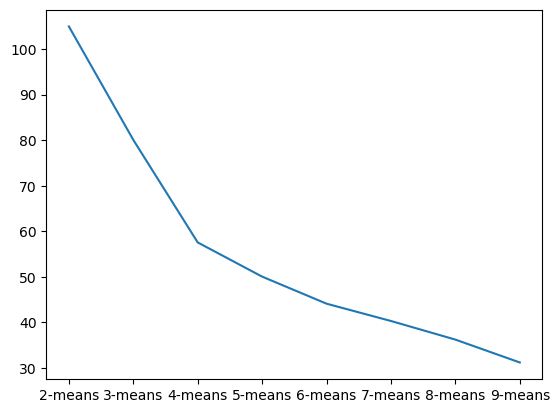

In [345]:
pd.Series(wss).plot()
plt.show()

In [337]:
kmeans= KMeans(n_clusters=4,random_state=2023)
kmeans.fit(arr_scaled)

KMeans(n_clusters=4, random_state=2023)

In [339]:
labels =kmeans.predict(arr_scaled)
arrest['Cluster']=labels

In [341]:
arrest=arrest.sort_values(by='Cluster')
arrest

,Murder,Assault,UrbanPop,Rape,Cluster
Alabama,13.2,236,58,21.2,0
Mississippi,16.1,259,44,17.1,0
North Carolina,13.0,337,45,16.1,0
Georgia,17.4,211,60,25.8,0
South Carolina,14.4,279,48,22.5,0
Louisiana,15.4,249,66,22.2,0
Arkansas,8.8,190,50,19.5,0
Tennessee,13.2,188,59,26.9,0
Utah,3.2,120,80,22.9,1
Rhode Island,3.4,174,87,8.3,1


In [343]:
arrest.groupby('Cluster').mean()

,Murder,Assault,UrbanPop,Rape
Cluster,,,,
0,13.937500,243.625000,53.750000,21.412500
1,5.656250,138.875000,73.875000,18.781250
2,3.600000,78.538462,52.076923,12.176923
3,10.815385,257.384615,76.000000,33.192308
